In [632]:
# 📦 Gerekli Kütüphanelerin Import Edilmesi
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import signal
from sklearn.cluster import DBSCAN, KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots
import warnings
warnings.filterwarnings('ignore')

# Görselleştirme ayarları
plt.style.use('dark_background')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['font.size'] = 12

print("🎯 Kütüphaneler başarıyla yüklendi!")
print("📊 Matplotlib, Seaborn, Plotly hazır")
print("🤖 Scikit-learn hazır")
print("📈 Veri analizi başlayabilir!")


🎯 Kütüphaneler başarıyla yüklendi!
📊 Matplotlib, Seaborn, Plotly hazır
🤖 Scikit-learn hazır
📈 Veri analizi başlayabilir!


In [633]:
# 📡 Radar ve LiDAR (Sol Radar) Verisinin Yüklenmesi ve Filtrelenmesi

import pandas as pd
import numpy as np

# Sütun isimleri (GitHub formatına göre)
column_names = [
    'sensor_channel',  # R = Radar, L = LiDAR (Sol Radar)
    'm_rho',           # Range (metre)
    'm_phi',           # Bearing angle (radyan) 
    'm_drho',          # Range rate (m/s)
    'timestamp',       # Zaman damgası (mikrosaniye)
    'r_px',            # Ground truth X pozisyonu (metre)
    'r_py',            # Ground truth Y pozisyonu (metre)
    'r_vx',            # Ground truth X hızı (m/s)
    'r_vy'             # Ground truth Y hızı (m/s)
]

print("📡 Veri yükleniyor...")
try:
    # Tüm veriyi yükle
    df_all = pd.read_csv('data-1.txt', sep='\t', names=column_names, header=None)
    
    # Sağ radar verisini filtrele (R)
    df_radar = df_all[df_all['sensor_channel'] == 'R'].copy()
    df_radar.reset_index(drop=True, inplace=True)
    
    # Sol radar verisini filtrele (L)
    df_sol = df_all[df_all['sensor_channel'] == 'L'].copy()
    df_sol.reset_index(drop=True, inplace=True)
    
    print(f"✅ Veriler başarıyla filtrelendi!")
    print(f"📏 Toplam satır sayısı: {df_all.shape[0]}")
    print(f"📡 Sağ radar (R) satır sayısı: {df_radar.shape[0]}")
    print(f"📡 Sol radar (L) satır sayısı: {df_sol.shape[0]}")
    print(f"💾 Sağ radar hafıza kullanımı: {df_radar.memory_usage(deep=True).sum() / 1024**2:.2f} MB")
    print(f"💾 Sol radar hafıza kullanımı: {df_sol.memory_usage(deep=True).sum() / 1024**2:.2f} MB")

except Exception as e:
    print(f"❌ Hata: {e}")

# Radar measurement özet fonksiyonu
def print_summary(df, name="Radar"):
    print(f"\n📊 {name} Measurement Özeti:")
    print(f"   🎯 Range: {df['m_rho'].min():.2f} - {df['m_rho'].max():.2f} metre")
    print(f"   🧭 Bearing: {np.degrees(df['m_phi'].min()):.1f}° - {np.degrees(df['m_phi'].max()):.1f}°")
    print(f"   ⚡ Range Rate: {df['m_drho'].min():.2f} - {df['m_drho'].max():.2f} m/s")
    print(f"\n🔍 İlk 5 {name} Ölçümü:")
    print(df.head())

# Koordinat dönüşüm fonksiyonu
def polar_to_cartesian(rho, phi):
    """Polar koordinatları Cartesian'a çevirir"""
    x = rho * np.cos(phi)
    y = rho * np.sin(phi)
    return x, y

# Sağ radar için koordinat dönüşümü ve özet
df_radar['meas_x'], df_radar['meas_y'] = polar_to_cartesian(df_radar['m_rho'], df_radar['m_phi'])
print_summary(df_radar, "Sağ Radar")

# Sol radar için koordinat dönüşümü ve özet
if len(df_sol) > 0:
    df_sol['meas_x'], df_sol['meas_y'] = polar_to_cartesian(df_sol['m_rho'], df_sol['m_phi'])
    print_summary(df_sol, "Sol Radar")
else:
    print("\n⚠️ Sol radar (L) verisi bulunamadı veya boş!")

print("✅ Cartesian koordinatlar başarıyla eklendi: meas_x, meas_y")


📡 Veri yükleniyor...
✅ Veriler başarıyla filtrelendi!
📏 Toplam satır sayısı: 1224
📡 Sağ radar (R) satır sayısı: 612
📡 Sol radar (L) satır sayısı: 612
💾 Sağ radar hafıza kullanımı: 0.07 MB
💾 Sol radar hafıza kullanımı: 0.07 MB

📊 Sağ Radar Measurement Özeti:
   🎯 Range: 6.28 - 15.90 metre
   🧭 Bearing: -68.6° - 1.8°
   ⚡ Range Rate: -4.32 - 4.29 m/s

🔍 İlk 5 Sağ Radar Ölçümü:
  sensor_channel    m_rho     m_phi    m_drho     timestamp  r_px  r_py  \
0              R  8.46642  0.028760 -3.040350  1.477010e+15  8.60  0.25   
1              R  8.57101  0.028232 -0.010526  1.477010e+15  8.45  0.25   
2              R  8.42927  0.030143 -1.858130  1.477010e+15  8.35  0.25   
3              R  7.93510  0.023744 -3.810770  1.477010e+15  8.05  0.20   
4              R  7.61428  0.020465 -3.220520  1.477010e+15  7.70  0.15   

      r_vx     r_vy    meas_x    meas_y  
0 -3.00029  0.00000  8.462919  0.243462  
1  0.00000  0.00000  8.567595  0.241943  
2 -1.81979  0.00000  8.425441  0.254042  
3 -

In [634]:
print(df_all['sensor_channel'].unique())


['R' 'L']


In [635]:
print("⚡ Radar verisi preprocessing başlıyor...")

def polar_to_cartesian(rho, phi):
    x = rho * np.cos(phi)
    y = rho * np.sin(phi)
    return x, y

# Sağ radar preprocessing
df_radar['meas_x'], df_radar['meas_y'] = polar_to_cartesian(df_radar['m_rho'], df_radar['m_phi'])
df_radar['m_phi_deg'] = np.degrees(df_radar['m_phi'])
df_radar['time_relative'] = (df_radar['timestamp'] - df_radar['timestamp'].min()) / 1e6

# Sol radar preprocessing
if not df_sol.empty:
    df_sol['meas_x'], df_sol['meas_y'] = polar_to_cartesian(df_sol['m_rho'], df_sol['m_phi'])
    df_sol['m_phi_deg'] = np.degrees(df_sol['m_phi'])
    df_sol['time_relative'] = (df_sol['timestamp'] - df_sol['timestamp'].min()) / 1e6
else:
    print("⚠️ Sol radar verisi bulunamadı veya boş!")

def print_summary(df, name="Radar"):
    print(f"\n📊 {name} ÖZETİ:")
    print("=" * 30)
    print(f"🎯 Ölçüm sayısı: {len(df)}")
    print(f"📏 Mesafe aralığı: {df['m_rho'].min():.2f} - {df['m_rho'].max():.2f} metre")
    print(f"🧭 Açı aralığı: {df['m_phi_deg'].min():.1f}° - {df['m_phi_deg'].max():.1f}°")
    print(f"⚡ Hız aralığı: {df['m_drho'].min():.2f} - {df['m_drho'].max():.2f} m/s")
    print(f"🌐 X pozisyon: {df['meas_x'].min():.2f} - {df['meas_x'].max():.2f} metre")
    print(f"🌐 Y pozisyon: {df['meas_y'].min():.2f} - {df['meas_y'].max():.2f} metre")
    print(f"⏱️ Süre: {df['time_relative'].max():.2f} saniye")
    print(f"❌ NaN değer sayısı: {df.isnull().sum().sum()}")
    print(f"🔢 Negatif mesafe sayısı: {(df['m_rho'] < 0).sum()}")
    print(f"📊 Veri bütünlüğü: {'✅ TAMAM' if df.isnull().sum().sum() == 0 else '⚠️ SORUN VAR'}")

print_summary(df_radar, "Sağ Radar")

if not df_sol.empty:
    print_summary(df_sol, "Sol Radar")
else:
    print("\n⚠️ Sol radar verisi için özet yapılamadı, veri bulunamadı.")

print("\n🎯 Preprocessing tamamlandı!")


⚡ Radar verisi preprocessing başlıyor...

📊 Sağ Radar ÖZETİ:
🎯 Ölçüm sayısı: 612
📏 Mesafe aralığı: 6.28 - 15.90 metre
🧭 Açı aralığı: -68.6° - 1.8°
⚡ Hız aralığı: -4.32 - 4.29 m/s
🌐 X pozisyon: 4.35 - 11.45 metre
🌐 Y pozisyon: -13.42 - 0.26 metre
⏱️ Süre: 65.26 saniye
❌ NaN değer sayısı: 0
🔢 Negatif mesafe sayısı: 0
📊 Veri bütünlüğü: ✅ TAMAM

📊 Sol Radar ÖZETİ:
🎯 Ölçüm sayısı: 612
📏 Mesafe aralığı: 4.37 - 11.37 metre
🧭 Açı aralığı: -760.1° - 15.1°
⚡ Hız aralığı: 1477010443449633.00 - 1477010508709711.00 m/s
🌐 X pozisyon: -11.10 - 10.24 metre
🌐 Y pozisyon: -11.35 - 9.95 metre
⏱️ Süre: 0.00 saniye
❌ NaN değer sayısı: 612
🔢 Negatif mesafe sayısı: 0
📊 Veri bütünlüğü: ⚠️ SORUN VAR

🎯 Preprocessing tamamlandı!


🎨 Radar-specific görselleştirmeler oluşturuluyor...



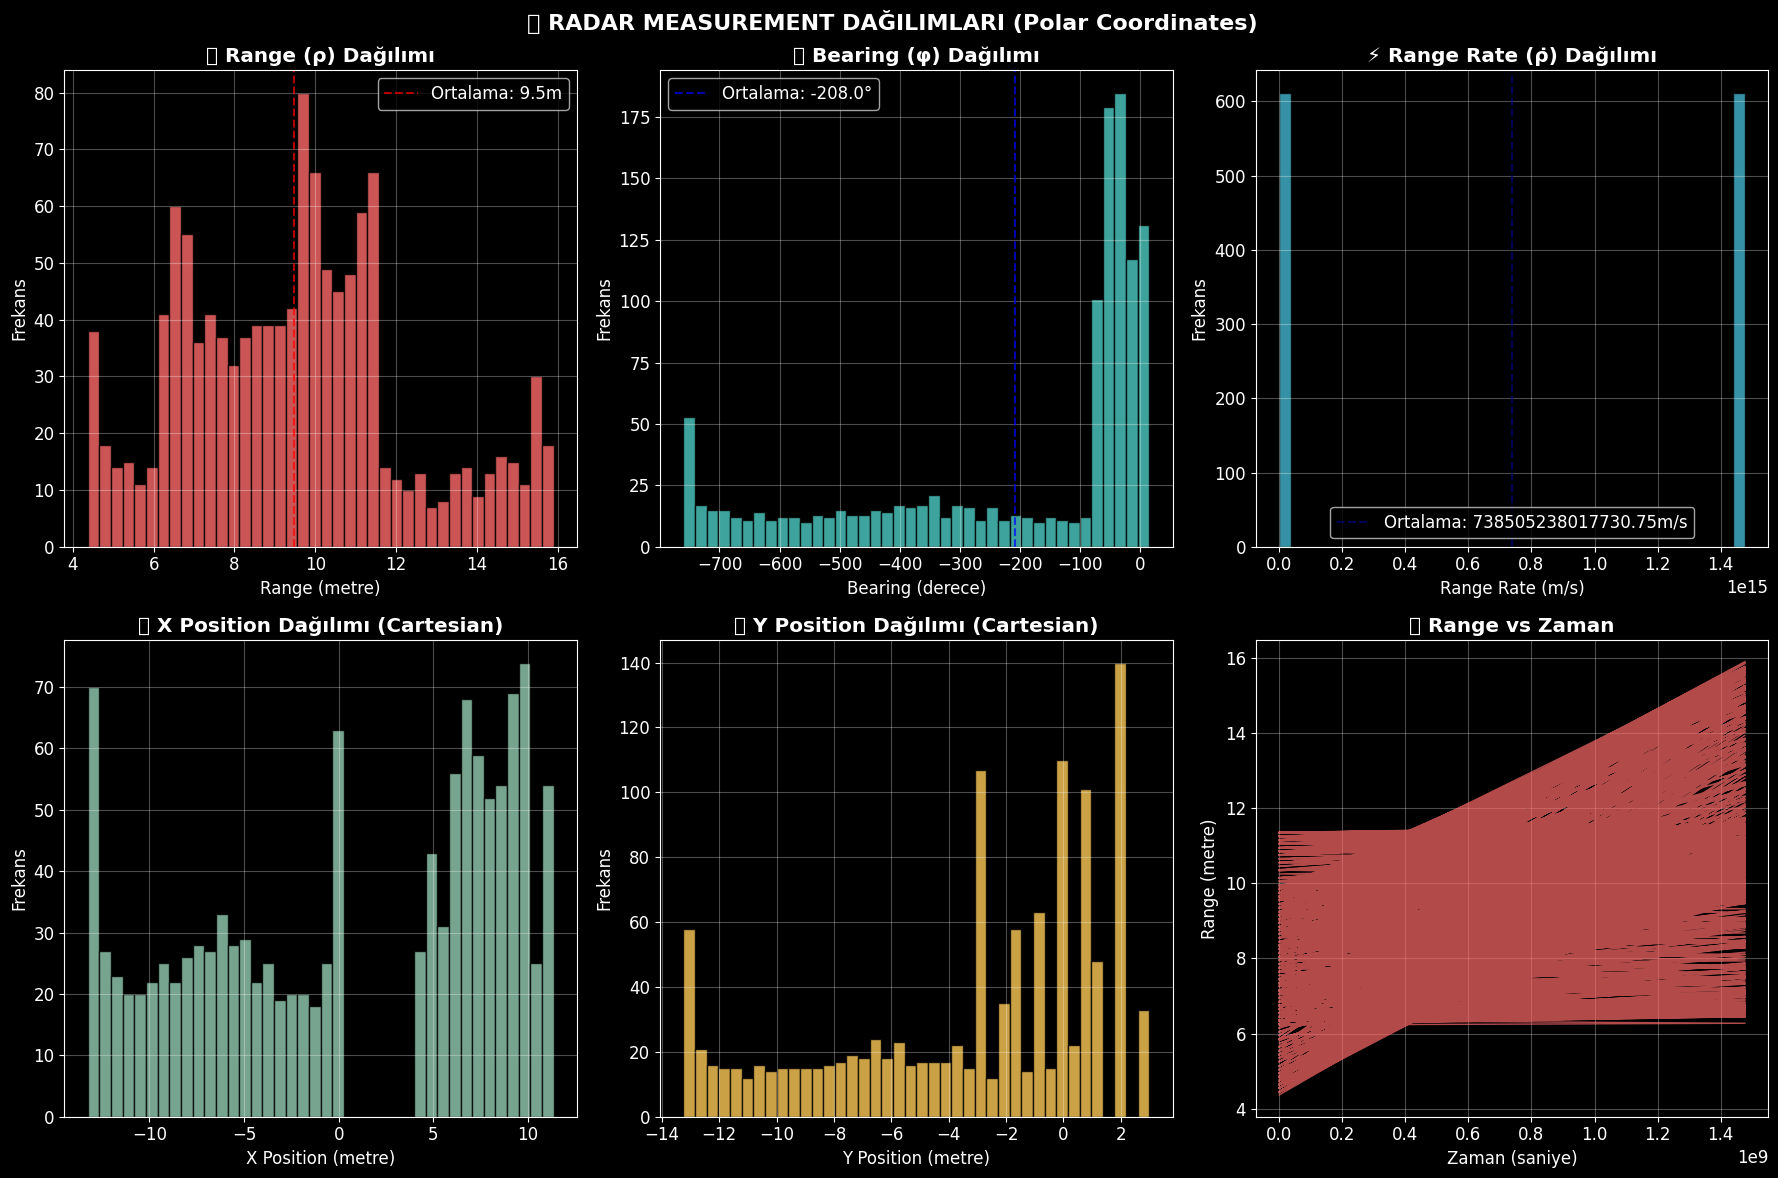

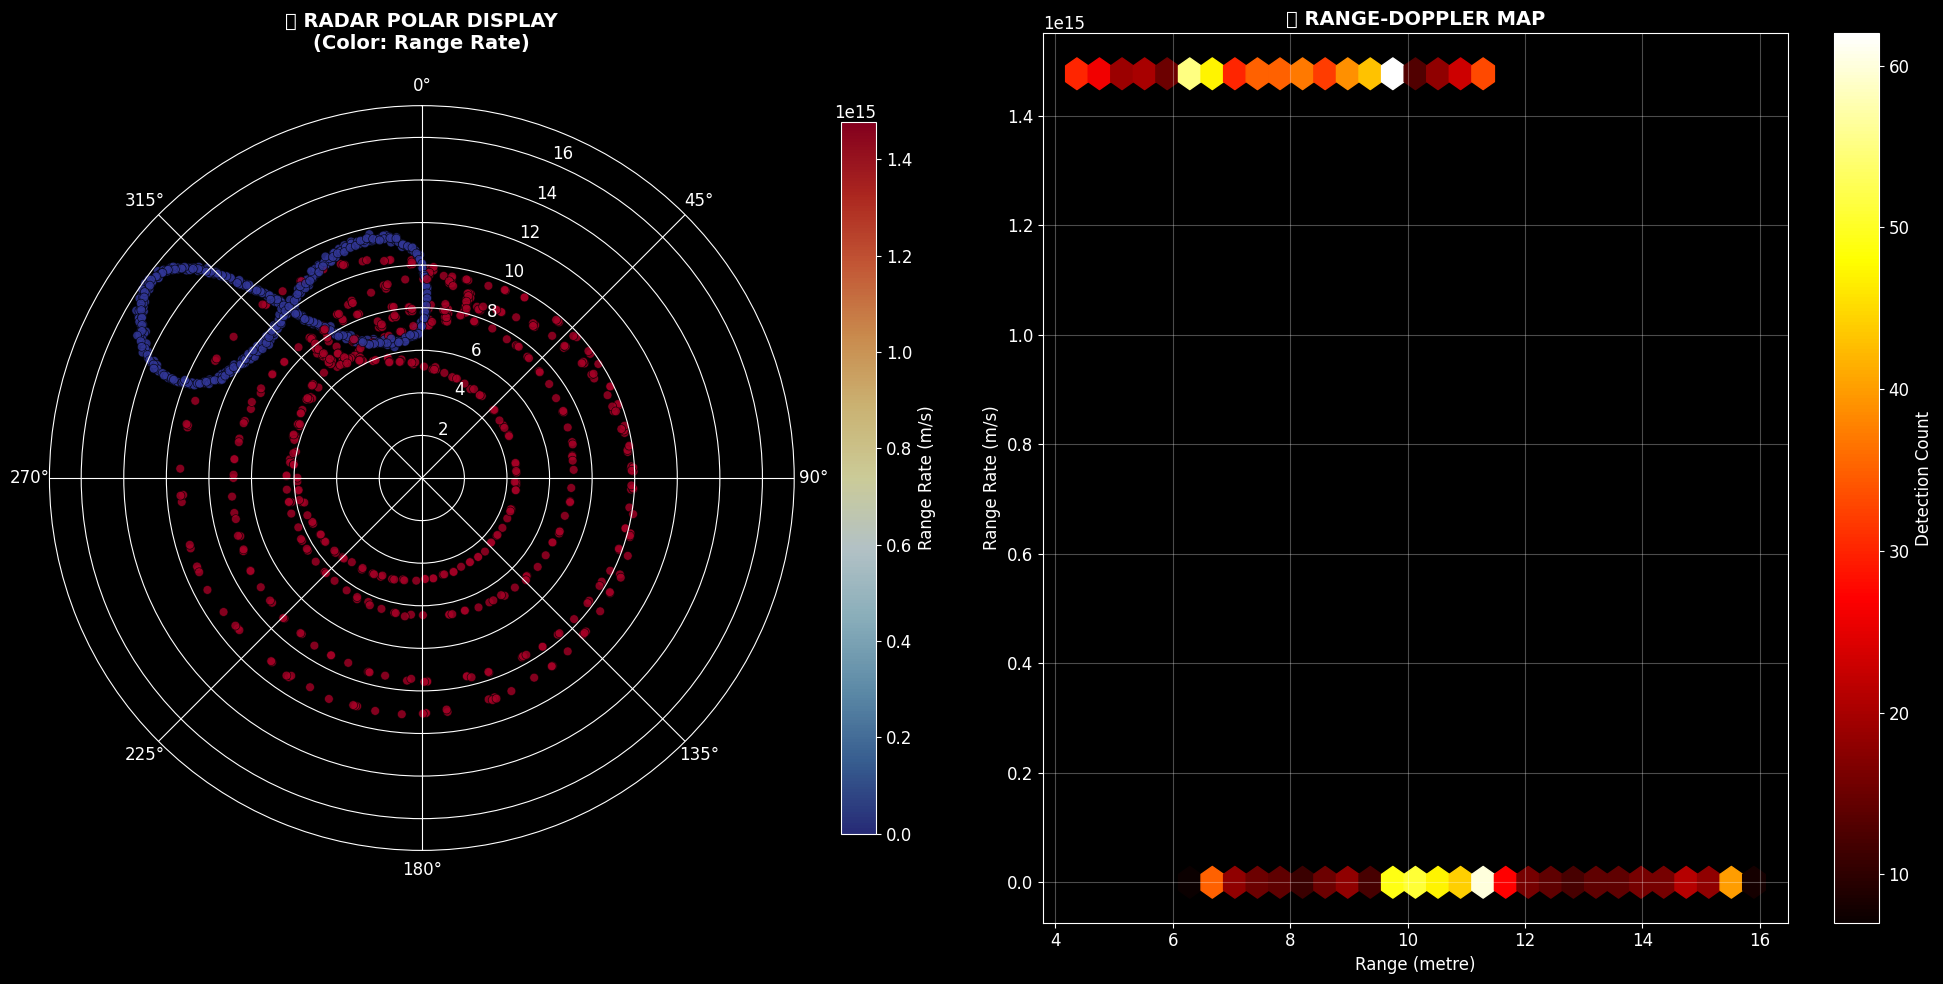

✅ Radar measurement görselleştirmeleri tamamlandı!
📊 Analiz edilen radar measurement sayısı: 1224
🎯 Range aralığı: 4.37 - 15.90 metre
🧭 Bearing aralığı: -760.1° - 15.1°
⚡ Range rate aralığı: -4.32 - 1477010508709711.00 m/s


In [636]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

print("🎨 Radar-specific görselleştirmeler oluşturuluyor...\n")

# Eğer 'meas_x' ve 'meas_y' yoksa r_px ve r_py kullanacağız
if 'meas_x' not in df.columns:
    df['meas_x'] = df['r_px']  # Cartesian x pozisyon
if 'meas_y' not in df.columns:
    df['meas_y'] = df['r_py']  # Cartesian y pozisyon

# Eğer 'time_relative' yoksa ilk timestamp baz alınarak saniyeye çevir
if 'time_relative' not in df.columns:
    df['time_relative'] = (df['timestamp'] - df['timestamp'].min()) / 1e6  # timestamp mikrosaniye ise

# Eğer 'm_phi_deg' yoksa radyandan dereceye çevir
if 'm_phi_deg' not in df.columns:
    df['m_phi_deg'] = np.degrees(df['m_phi'])

# 1. Radar Measurement Dağılımları (Polar Coordinates)
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
fig.suptitle('📡 RADAR MEASUREMENT DAĞILIMLARI (Polar Coordinates)', fontsize=16, fontweight='bold', y=0.98)

# Range (ρ) histogramı
axes[0,0].hist(df['m_rho'], bins=40, alpha=0.8, color='#FF6B6B', edgecolor='black')
axes[0,0].set_title('📏 Range (ρ) Dağılımı', fontweight='bold')
axes[0,0].set_xlabel('Range (metre)')
axes[0,0].set_ylabel('Frekans')
axes[0,0].grid(True, alpha=0.3)
axes[0,0].axvline(df['m_rho'].mean(), color='red', linestyle='--', alpha=0.7, 
                  label=f'Ortalama: {df["m_rho"].mean():.1f}m')
axes[0,0].legend()

# Bearing (φ) histogramı - derece
axes[0,1].hist(df['m_phi_deg'], bins=40, alpha=0.8, color='#4ECDC4', edgecolor='black')
axes[0,1].set_title('🧭 Bearing (φ) Dağılımı', fontweight='bold')
axes[0,1].set_xlabel('Bearing (derece)')
axes[0,1].set_ylabel('Frekans')
axes[0,1].grid(True, alpha=0.3)
axes[0,1].axvline(df['m_phi_deg'].mean(), color='blue', linestyle='--', alpha=0.7, 
                  label=f'Ortalama: {df["m_phi_deg"].mean():.1f}°')
axes[0,1].legend()

# Range Rate (ρ̇) histogramı
axes[0,2].hist(df['m_drho'], bins=40, alpha=0.8, color='#45B7D1', edgecolor='black')
axes[0,2].set_title('⚡ Range Rate (ρ̇) Dağılımı', fontweight='bold')
axes[0,2].set_xlabel('Range Rate (m/s)')
axes[0,2].set_ylabel('Frekans')
axes[0,2].grid(True, alpha=0.3)
axes[0,2].axvline(df['m_drho'].mean(), color='navy', linestyle='--', alpha=0.7, 
                  label=f'Ortalama: {df["m_drho"].mean():.2f}m/s')
axes[0,2].legend()

# Cartesian koordinatlarda dağılımlar
axes[1,0].hist(df['meas_x'], bins=40, alpha=0.8, color='#96CEB4', edgecolor='black')
axes[1,0].set_title('📐 X Position Dağılımı (Cartesian)', fontweight='bold')
axes[1,0].set_xlabel('X Position (metre)')
axes[1,0].set_ylabel('Frekans')
axes[1,0].grid(True, alpha=0.3)

axes[1,1].hist(df['meas_y'], bins=40, alpha=0.8, color='#FECA57', edgecolor='black')
axes[1,1].set_title('📐 Y Position Dağılımı (Cartesian)', fontweight='bold')
axes[1,1].set_xlabel('Y Position (metre)')
axes[1,1].set_ylabel('Frekans')
axes[1,1].grid(True, alpha=0.3)

# Zaman serisi görünümü
axes[1,2].plot(df['time_relative'], df['m_rho'], alpha=0.7, color='#FF6B6B', linewidth=1)
axes[1,2].set_title('⏱️ Range vs Zaman', fontweight='bold')
axes[1,2].set_xlabel('Zaman (saniye)')
axes[1,2].set_ylabel('Range (metre)')
axes[1,2].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# 2. POLAR RADAR DISPLAY - Authentic Radar Screen Simulation
fig = plt.figure(figsize=(20, 10))

# Ana polar radar görünümü
ax1 = plt.subplot(1, 2, 1, projection='polar')
scatter1 = ax1.scatter(df['m_phi'], df['m_rho'], 
                      c=df['m_drho'], s=40, alpha=0.8, cmap='RdYlBu_r', edgecolors='black', linewidth=0.5)
ax1.set_title('🎯 RADAR POLAR DISPLAY\n(Color: Range Rate)', fontweight='bold', pad=20, fontsize=14)
ax1.set_ylim(0, df['m_rho'].max() * 1.1)
ax1.set_theta_zero_location('N')  # 0° kuzey (üst)
ax1.set_theta_direction(-1)       # Saat yönü
cbar1 = plt.colorbar(scatter1, ax=ax1, label='Range Rate (m/s)', shrink=0.8)

# Range-Doppler Map Style
ax2 = plt.subplot(1, 2, 2)
# Hexbin for density-based visualization
hb = ax2.hexbin(df['m_rho'], df['m_drho'], gridsize=30, cmap='hot', mincnt=1)
ax2.set_title('🔥 RANGE-DOPPLER MAP', fontweight='bold', fontsize=14)
ax2.set_xlabel('Range (metre)')
ax2.set_ylabel('Range Rate (m/s)')
ax2.grid(True, alpha=0.3)
cbar2 = plt.colorbar(hb, ax=ax2, label='Detection Count')

plt.tight_layout()
plt.show()

print("✅ Radar measurement görselleştirmeleri tamamlandı!")
print(f"📊 Analiz edilen radar measurement sayısı: {len(df)}")
print(f"🎯 Range aralığı: {df['m_rho'].min():.2f} - {df['m_rho'].max():.2f} metre")
print(f"🧭 Bearing aralığı: {df['m_phi_deg'].min():.1f}° - {df['m_phi_deg'].max():.1f}°")
print(f"⚡ Range rate aralığı: {df['m_drho'].min():.2f} - {df['m_drho'].max():.2f} m/s")


🎨 Radar verisi görselleştirmeleri oluşturuluyor...



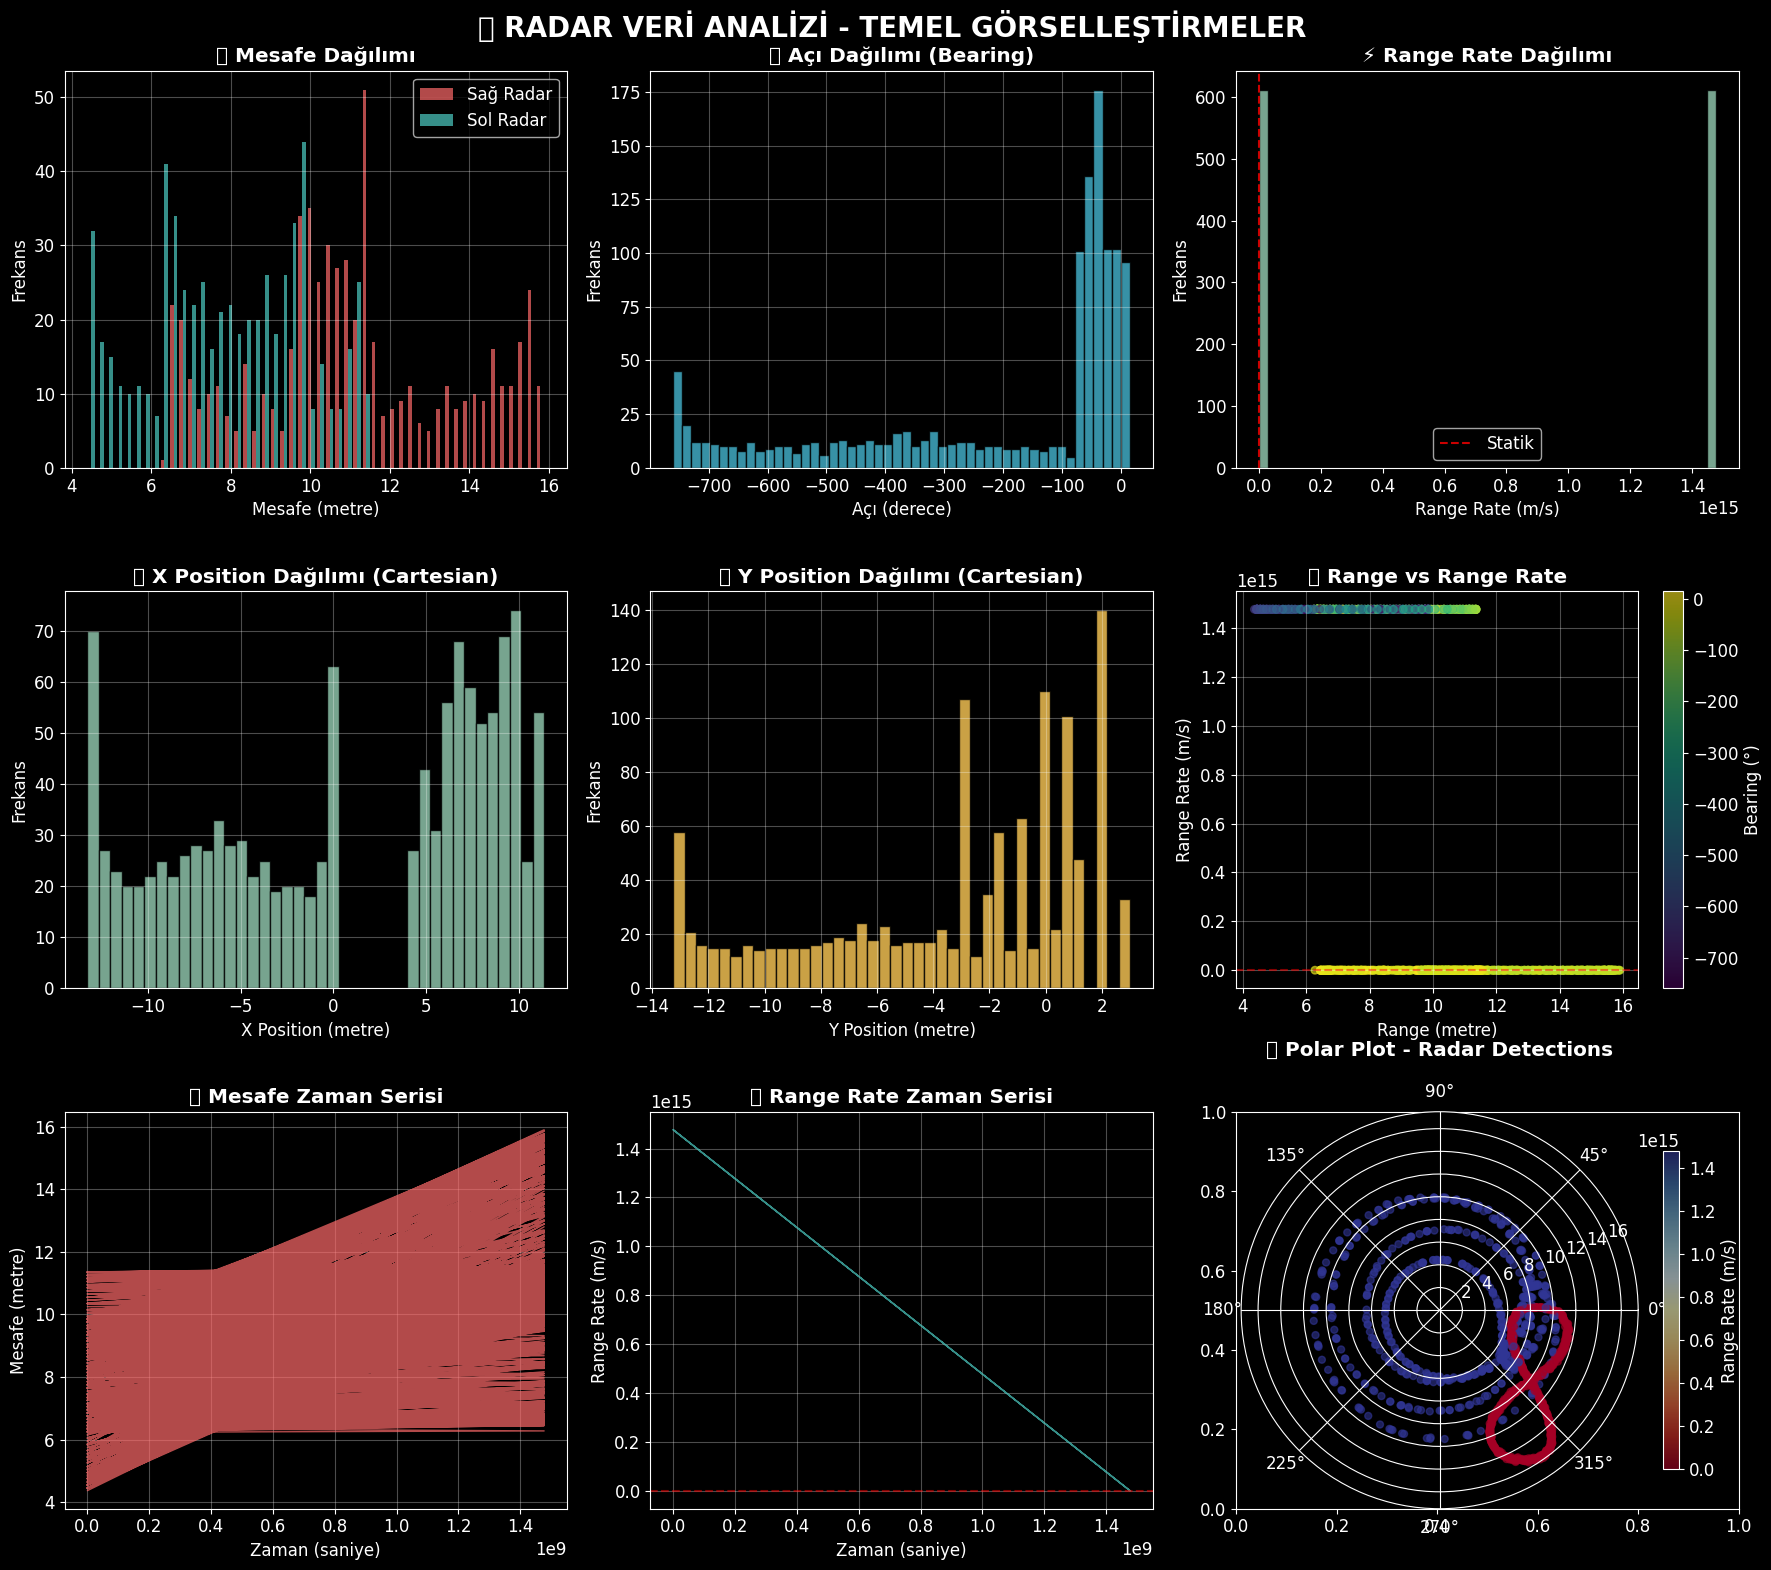

✅ Radar görselleştirmeleri tamamlandı!


In [637]:
# 🎨 Temel Radar Görselleştirmeleri

print("🎨 Radar verisi görselleştirmeleri oluşturuluyor...\n")

# Görselleştirme ayarları
plt.style.use('dark_background')
fig, axes = plt.subplots(3, 3, figsize=(18, 16))
fig.suptitle('🎯 RADAR VERİ ANALİZİ - TEMEL GÖRSELLEŞTİRMELER', fontsize=20, fontweight='bold', y=0.98)

# 1. Mesafe Dağılımı - Dinamik renk ayarı
hist_data = []
hist_labels = []
hist_colors = []

# Sağ radar her zaman var
hist_data.append(right_sensor['m_rho'])
hist_labels.append('Sağ Radar')
hist_colors.append('#FF6B6B')

# Sol radar varsa ekle
if len(left_sensor) > 0:
    hist_data.append(left_sensor['m_rho'])
    hist_labels.append('Sol Radar')
    hist_colors.append('#4ECDC4')

axes[0,0].hist(hist_data, bins=50, alpha=0.7, label=hist_labels, color=hist_colors)
axes[0,0].set_title('📏 Mesafe Dağılımı', fontweight='bold')
axes[0,0].set_xlabel('Mesafe (metre)')
axes[0,0].set_ylabel('Frekans')
axes[0,0].legend()
axes[0,0].grid(True, alpha=0.3)

# 2. Açı Dağılımı
axes[0,1].hist(df['m_phi_deg'], bins=50, alpha=0.8, color='#45B7D1', edgecolor='black')
axes[0,1].set_title('🧭 Açı Dağılımı (Bearing)', fontweight='bold')
axes[0,1].set_xlabel('Açı (derece)')
axes[0,1].set_ylabel('Frekans')
axes[0,1].grid(True, alpha=0.3)

# 3. Range Rate Dağılımı
axes[0,2].hist(df['m_drho'], bins=50, alpha=0.8, color='#96CEB4', edgecolor='black')
axes[0,2].set_title('⚡ Range Rate Dağılımı', fontweight='bold')
axes[0,2].set_xlabel('Range Rate (m/s)')
axes[0,2].set_ylabel('Frekans')
axes[0,2].axvline(x=0, color='red', linestyle='--', alpha=0.8, label='Statik')
axes[0,2].legend()

# Cartesian koordinatlarda dağılımlar
axes[1,0].hist(df['meas_x'], bins=40, alpha=0.8, color='#96CEB4', edgecolor='black')
axes[1,0].set_title('📐 X Position Dağılımı (Cartesian)', fontweight='bold')
axes[1,0].set_xlabel('X Position (metre)')
axes[1,0].set_ylabel('Frekans')
axes[1,0].grid(True, alpha=0.3)

axes[1,1].hist(df['meas_y'], bins=40, alpha=0.8, color='#FECA57', edgecolor='black')
axes[1,1].set_title('📐 Y Position Dağılımı (Cartesian)', fontweight='bold')
axes[1,1].set_xlabel('Y Position (metre)')
axes[1,1].set_ylabel('Frekans')
axes[1,1].grid(True, alpha=0.3)

# Scatter Plot: Range vs Range Rate
scatter = axes[1,2].scatter(df['m_rho'], df['m_drho'], c=df['m_phi_deg'], 
                           cmap='viridis', alpha=0.6, s=30)
axes[1,2].set_title('🎯 Range vs Range Rate', fontweight='bold')
axes[1,2].set_xlabel('Range (metre)')
axes[1,2].set_ylabel('Range Rate (m/s)')
axes[1,2].axhline(y=0, color='red', linestyle='--', alpha=0.5)
axes[1,2].grid(True, alpha=0.3)
plt.colorbar(scatter, ax=axes[1,2], label='Bearing (°)')

# Time series plots
axes[2,0].plot(df['time_relative'], df['m_rho'], alpha=0.7, color='#FF6B6B', linewidth=1)
axes[2,0].set_title('📈 Mesafe Zaman Serisi', fontweight='bold')
axes[2,0].set_xlabel('Zaman (saniye)')
axes[2,0].set_ylabel('Mesafe (metre)')
axes[2,0].grid(True, alpha=0.3)

axes[2,1].plot(df['time_relative'], df['m_drho'], alpha=0.7, color='#4ECDC4', linewidth=1)
axes[2,1].set_title('📈 Range Rate Zaman Serisi', fontweight='bold')
axes[2,1].set_xlabel('Zaman (saniye)')
axes[2,1].set_ylabel('Range Rate (m/s)')
axes[2,1].axhline(y=0, color='red', linestyle='--', alpha=0.5)
axes[2,1].grid(True, alpha=0.3)

# Polar Plot
theta = df['m_phi'].values
r = df['m_rho'].values
axes[2,2] = plt.subplot(3, 3, 9, projection='polar')
scatter_polar = axes[2,2].scatter(theta, r, c=df['m_drho'], cmap='RdYlBu', alpha=0.6, s=25)
axes[2,2].set_title('🎯 Polar Plot - Radar Detections', fontweight='bold', pad=20)
axes[2,2].set_ylim(0, max(r) * 1.1)
plt.colorbar(scatter_polar, ax=axes[2,2], label='Range Rate (m/s)', shrink=0.8)

plt.tight_layout()
plt.show()

print("✅ Radar görselleştirmeleri tamamlandı!")

In [638]:
import numpy as np

# 🧠 Extended Kalman Filter (EKF) - Radar-Only Implementation
print("🧠 Radar-only Extended Kalman Filter implementasyonu...\n")

class RadarEKF:
    """Extended Kalman Filter for Radar-Only Tracking"""

    def __init__(self):
        # State vector: [x, y, vx, vy]
        self.x = np.zeros(4)

        # State covariance matrix
        self.P = np.eye(4) * 1000  # High initial uncertainty

        # Process noise (acceleration uncertainty)
        self.process_noise_ax = 9.0  # m/s²
        self.process_noise_ay = 9.0  # m/s²

        # Radar measurement noise covariance matrix
        self.R_radar = np.array([
            [0.09, 0, 0],         # Range variance (0.3m std)
            [0, 0.0009, 0],       # Bearing variance (0.03 rad std)
            [0, 0, 0.09]          # Range rate variance (0.3 m/s std)
        ])

        # State transition matrix F (will be updated with dt)
        self.F = np.eye(4)

        print("✅ RadarEKF initialized")
        print(f"   📊 State vector: (x, y, vx, vy)")
        print(f"   📡 Measurement model: (ρ, φ, ρ̇)")
        print(f"   🔧 Process noise: ax={self.process_noise_ax}, ay={self.process_noise_ay}")

    def predict(self, dt):
        """Prediction step - motion model"""
        self.F = np.array([
            [1, 0, dt, 0],
            [0, 1, 0, dt],
            [0, 0, 1, 0],
            [0, 0, 0, 1]
        ])

        dt2 = dt * dt
        dt3 = dt2 * dt
        dt4 = dt3 * dt

        Q = np.array([
            [dt4/4 * self.process_noise_ax, 0, dt3/2 * self.process_noise_ax, 0],
            [0, dt4/4 * self.process_noise_ay, 0, dt3/2 * self.process_noise_ay],
            [dt3/2 * self.process_noise_ax, 0, dt2 * self.process_noise_ax, 0],
            [0, dt3/2 * self.process_noise_ay, 0, dt2 * self.process_noise_ay]
        ])

        self.x = self.F @ self.x
        self.P = self.F @ self.P @ self.F.T + Q

    def calculate_jacobian(self, px, py, vx, vy):
        """Calculate Jacobian matrix for radar measurements"""
        eps = 1e-6
        if abs(px) < eps and abs(py) < eps:
            px, py = eps, eps

        c1 = px**2 + py**2
        c2 = np.sqrt(c1)
        c3 = c1 * c2

        if c1 < eps:
            c1 = eps
            c2 = np.sqrt(c1)
            c3 = c1 * c2

        Hj = np.array([
            [px/c2, py/c2, 0, 0],
            [-py/c1, px/c1, 0, 0],
            [py*(vx*py - vy*px)/c3, px*(vy*px - vx*py)/c3, px/c2, py/c2]
        ])

        return Hj

    def update_radar(self, measurement):
        """Update step for Radar measurements"""
        rho, phi, drho = measurement
        px, py, vx, vy = self.x

        # Measurement prediction
        rho_pred = np.sqrt(px**2 + py**2)
        phi_pred = np.arctan2(py, px)
        if rho_pred < 1e-6:
            rho_pred = 1e-6
        drho_pred = (px*vx + py*vy) / rho_pred

        h = np.array([rho_pred, phi_pred, drho_pred])
        z = np.array([rho, phi, drho])
        y = z - h

        # Normalize angle
        while y[1] > np.pi:
            y[1] -= 2*np.pi
        while y[1] < -np.pi:
            y[1] += 2*np.pi

        Hj = self.calculate_jacobian(px, py, vx, vy)
        S = Hj @ self.P @ Hj.T + self.R_radar

        # Kalman gain with robust inversion
        try:
            K = self.P @ Hj.T @ np.linalg.inv(S)
        except np.linalg.LinAlgError:
            print("⚠️ Singular matrix detected, applying regularization...")
            S_reg = S + 1e-4 * np.eye(S.shape[0])
            try:
                K = self.P @ Hj.T @ np.linalg.inv(S_reg)
            except np.linalg.LinAlgError:
                print("⚠️ Using pseudo-inverse as fallback...")
                K = self.P @ Hj.T @ np.linalg.pinv(S)

        # State and covariance update
        self.x = self.x + K @ y
        I = np.eye(4)
        self.P = (I - K @ Hj) @ self.P

        # Ensure positive definiteness
        min_eig = np.min(np.linalg.eigvals(self.P))
        if min_eig < 1e-6:
            self.P += 1e-6 * np.eye(self.P.shape[0])

        # NIS (Normalized Innovation Squared) Calculation
        try:
            nis = y.T @ np.linalg.inv(S) @ y
        except np.linalg.LinAlgError:
            nis = y.T @ np.linalg.pinv(S) @ y

        return nis

# EKF instance oluştur
ekf = RadarEKF()

print("\n🎯 Radar-only EKF hazır!")
print("📡 Measurement space: Polar (ρ, φ, ρ̇)")
print("📊 State space: Cartesian (x, y, vx, vy)")
print("🔄 Nonlinear measurement model with Jacobian")


🧠 Radar-only Extended Kalman Filter implementasyonu...

✅ RadarEKF initialized
   📊 State vector: (x, y, vx, vy)
   📡 Measurement model: (ρ, φ, ρ̇)
   🔧 Process noise: ax=9.0, ay=9.0

🎯 Radar-only EKF hazır!
📡 Measurement space: Polar (ρ, φ, ρ̇)
📊 State space: Cartesian (x, y, vx, vy)
🔄 Nonlinear measurement model with Jacobian


In [639]:
# 🔄 Radar Tracking with Extended Kalman Filter

print("🔄 Radar-only tracking başlıyor...\n")

# Veri hazırlığı - sadece radar measurements
def prepare_radar_data(df):
    """Radar verisini EKF için hazırla"""
    radar_data = []
    
    for idx, row in df.iterrows():
        # Radar measurement (polar)
        measurement = [row['m_rho'],      # Range
                      row['m_phi'],       # Bearing
                      row['m_drho']]      # Range rate
        
        # Ground truth (cartesian)
        ground_truth = [row['r_px'],      # True x position
                       row['r_py'],       # True y position
                       row['r_vx'],       # True x velocity
                       row['r_vy']]       # True y velocity
        
        radar_data.append({
            'timestamp': row['timestamp'],
            'measurement': measurement,
            'ground_truth': ground_truth
        })
    
    return radar_data

# Veriyi işle
radar_measurements = prepare_radar_data(df)
print(f"📊 İşlenen radar measurement sayısı: {len(radar_measurements)}")

# EKF ile tracking
predictions = []
ground_truths = []
nis_values = []
measurement_residuals = []

# İlk ölçümle initialize et
first_measurement = radar_measurements[0]
rho, phi, drho = first_measurement['measurement']
ekf.x[0] = rho * np.cos(phi)  # x = ρ cos(φ)
ekf.x[1] = rho * np.sin(phi)  # y = ρ sin(φ)
ekf.x[2] = drho * np.cos(phi)  # vx approximation
ekf.x[3] = drho * np.sin(phi)  # vy approximation

prev_timestamp = first_measurement['timestamp']

print(f"🚀 EKF tracking başlıyor...")
print(f"   Initial state: x={ekf.x[0]:.3f}, y={ekf.x[1]:.3f}, vx={ekf.x[2]:.3f}, vy={ekf.x[3]:.3f}")

# Tracking loop
for i, data in enumerate(radar_measurements[1:], 1):
    # Delta time hesapla (mikrosaniye → saniye)
    dt = (data['timestamp'] - prev_timestamp) / 1e6
    
    # Çok büyük time step'leri sınırla
    if dt > 1.0:
        dt = 0.1
    elif dt <= 0:
        dt = 0.01
    
    # Predict step
    ekf.predict(dt)
    
    # Update step with radar measurement
    nis = ekf.update_radar(data['measurement'])
    
    # Sonuçları kaydet
    predictions.append(ekf.x.copy())
    ground_truths.append(data['ground_truth'])
    nis_values.append(nis)
    
    # Measurement residual for analysis
    rho, phi, drho = data['measurement']
    meas_cart = [rho * np.cos(phi), rho * np.sin(phi)]
    measurement_residuals.append([
        ekf.x[0] - meas_cart[0],  # x residual
        ekf.x[1] - meas_cart[1]   # y residual
    ])
    
    prev_timestamp = data['timestamp']
    
    # Progress update
    if i % 50 == 0:
        print(f"   Processed: {i}/{len(radar_measurements)-1} measurements")

print(f"\\n✅ Radar tracking tamamlandı!")
print(f"   Final state: x={ekf.x[0]:.3f}, y={ekf.x[1]:.3f}, vx={ekf.x[2]:.3f}, vy={ekf.x[3]:.3f}")

# NumPy arrays'e çevir
predictions = np.array(predictions)
ground_truths = np.array(ground_truths)
nis_values = np.array(nis_values)
measurement_residuals = np.array(measurement_residuals)

# Performance Metrics
def calculate_rmse(predictions, ground_truths):
    #\"\"\"Calculate Root Mean Square Error\"\"\"
    return np.sqrt(np.mean((predictions - ground_truths)**2, axis=0))

rmse = calculate_rmse(predictions, ground_truths)

print(f"\\n🎯 Radar EKF Performance Metrics:")
print(f"   📍 Position RMSE: {np.sqrt(rmse[0]**2 + rmse[1]**2):.4f} metre")
print(f"   🏃 Velocity RMSE: {np.sqrt(rmse[2]**2 + rmse[3]**2):.4f} m/s")
print(f"   📊 RMSE X:  {rmse[0]:.4f} metre")
print(f"   📊 RMSE Y:  {rmse[1]:.4f} metre")
print(f"   📊 RMSE VX: {rmse[2]:.4f} m/s")
print(f"   📊 RMSE VY: {rmse[3]:.4f} m/s")

# NIS Analysis
print(f"\\n📈 NIS (Normalized Innovation Squared) Analysis:")
print(f"   🎯 Radar NIS ortalama: {np.mean(nis_values):.3f}")
print(f"   🎯 Radar NIS %95 güven: {np.percentile(nis_values, 95):.3f} (ideal: 7.81)")
print(f"   🎯 NIS aralığı: {np.min(nis_values):.3f} - {np.max(nis_values):.3f}")

# Filter consistency check
nis_95_threshold = 7.81  # Chi-square 95% for 3 DOF
consistent_measurements = np.sum(nis_values < nis_95_threshold)
consistency_rate = consistent_measurements / len(nis_values) * 100

print(f"   🎯 Filter consistency: {consistency_rate:.1f}% (ideal: ~95%)")

if consistency_rate < 85:
    print("   ⚠️  Filter may be inconsistent - consider tuning noise parameters")
elif consistency_rate > 98:
    print("   ⚠️  Filter may be too conservative - consider reducing noise")
else:
    print("   ✅ Filter consistency is good!")


🔄 Radar-only tracking başlıyor...

📊 İşlenen radar measurement sayısı: 1224
🚀 EKF tracking başlıyor...
   Initial state: x=8.463, y=0.243, vx=-3.039, vy=-0.087
   Processed: 50/1223 measurements
   Processed: 100/1223 measurements
   Processed: 150/1223 measurements
   Processed: 200/1223 measurements
   Processed: 250/1223 measurements
   Processed: 300/1223 measurements
   Processed: 350/1223 measurements
   Processed: 400/1223 measurements
   Processed: 450/1223 measurements
   Processed: 500/1223 measurements
   Processed: 550/1223 measurements
   Processed: 600/1223 measurements
   Processed: 650/1223 measurements
   Processed: 700/1223 measurements
   Processed: 750/1223 measurements
   Processed: 800/1223 measurements
   Processed: 850/1223 measurements
   Processed: 900/1223 measurements
   Processed: 950/1223 measurements
   Processed: 1000/1223 measurements
   Processed: 1050/1223 measurements
   Processed: 1100/1223 measurements
   Processed: 1150/1223 measurements
   Proces

📊 Radar tracking performans görselleştirmeleri...



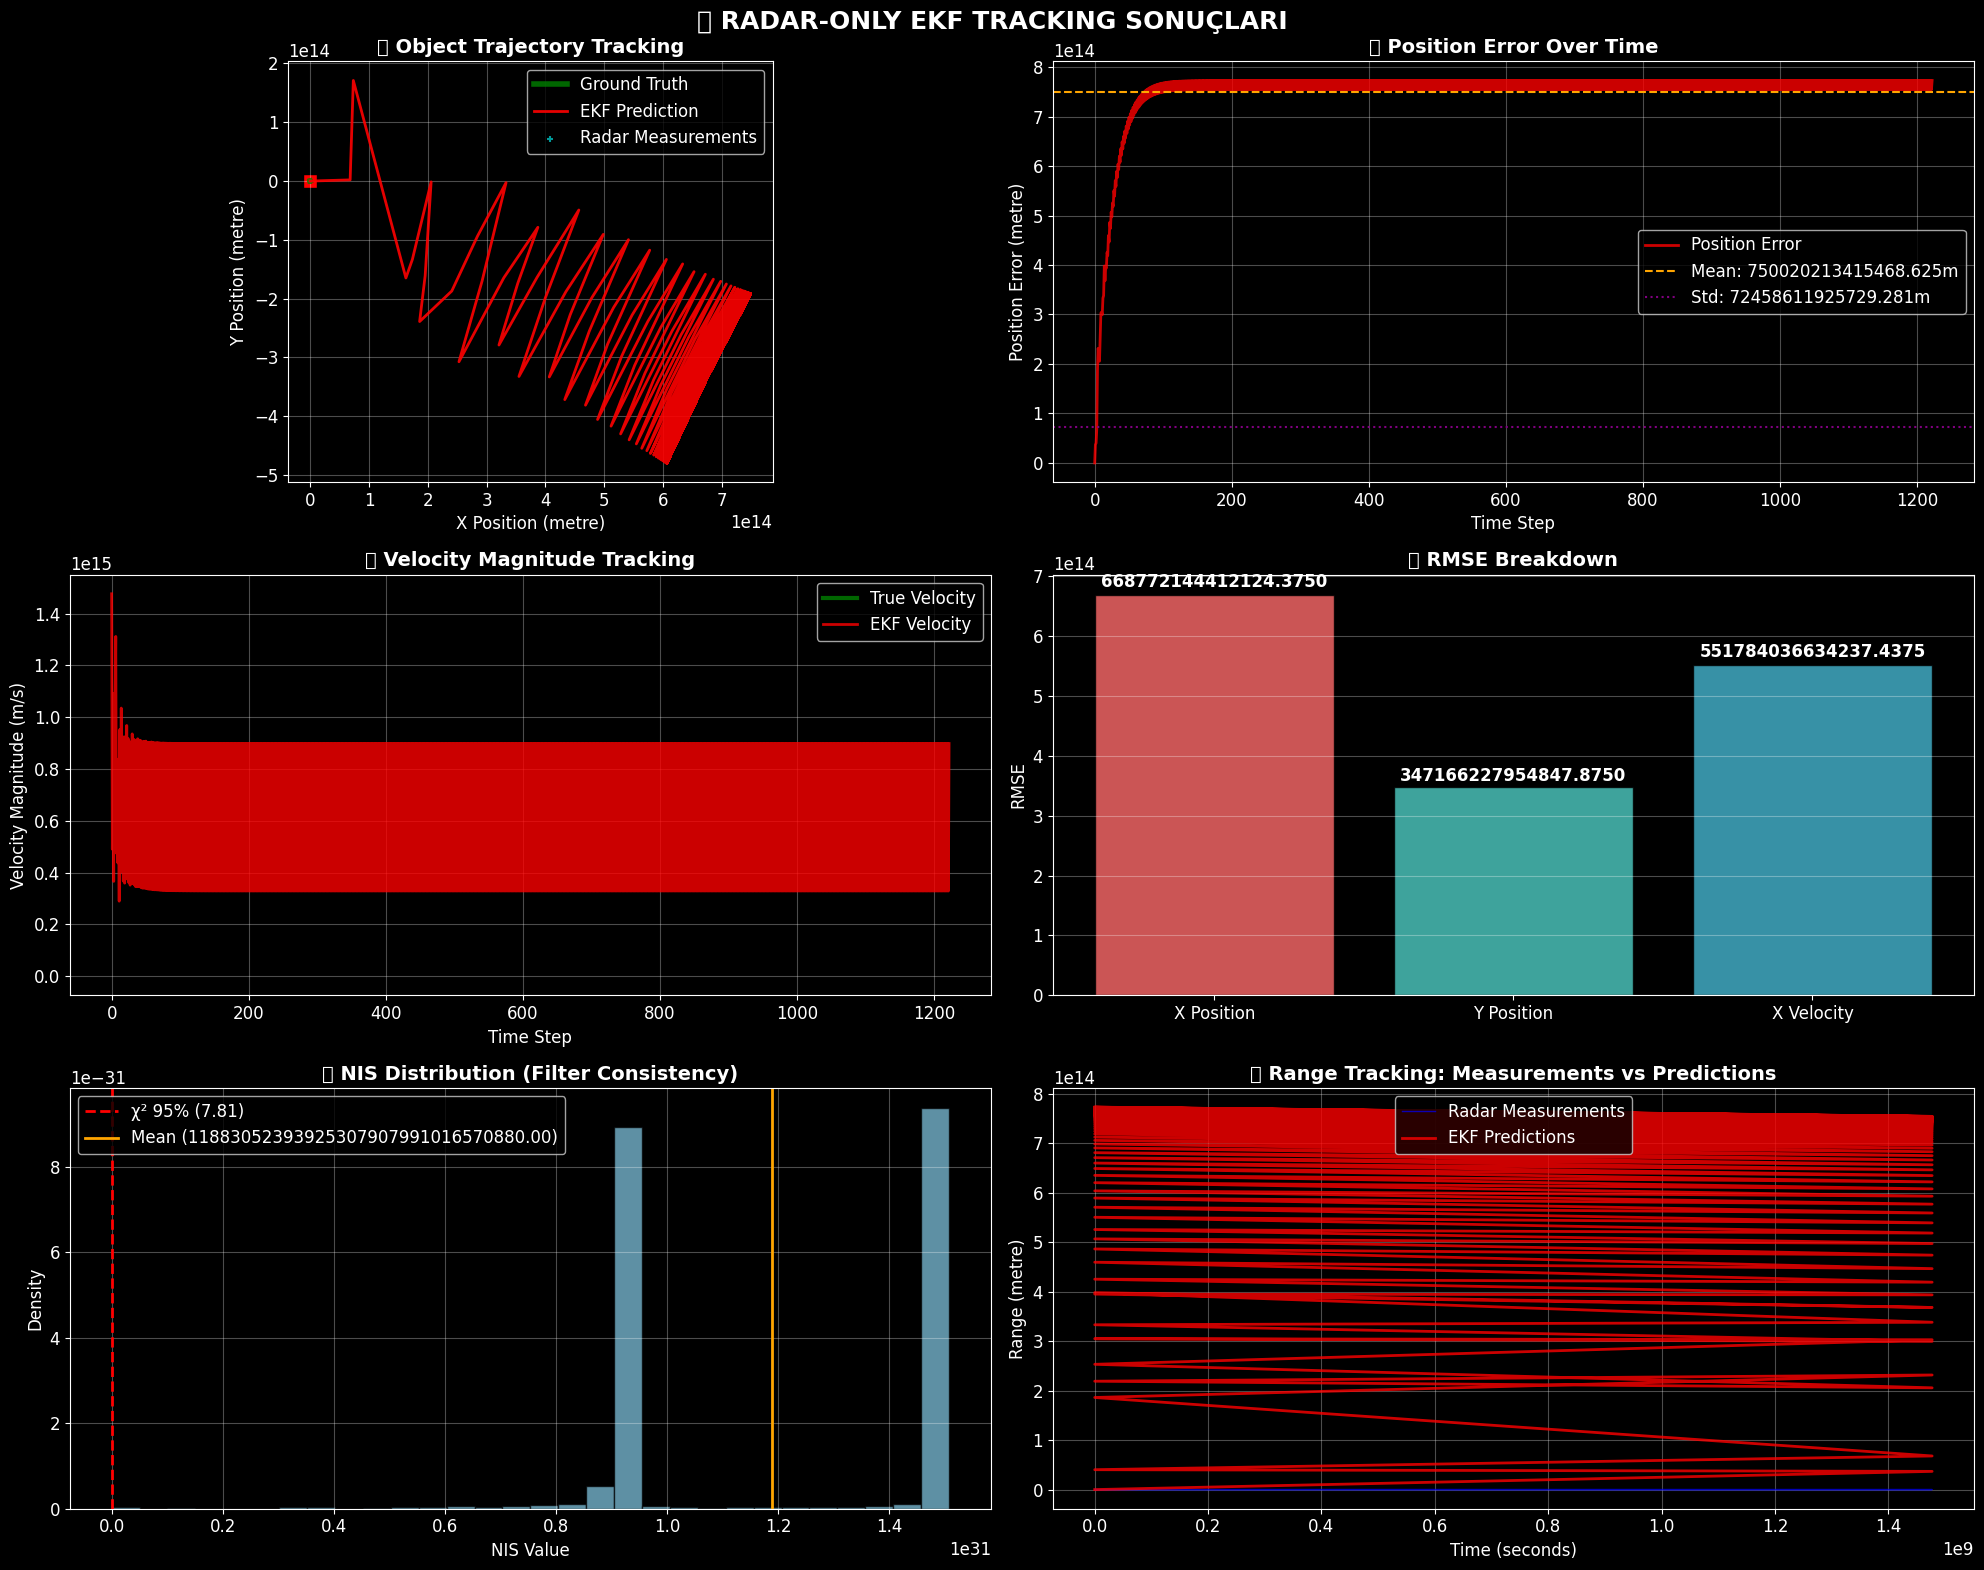

\n📊 RADAR TRACKING SUMMARY STATISTICS:
🎯 Total radar measurements processed: 1223
📍 Final position RMSE: 753512157150758.1250 metres
🏃 Final velocity RMSE: nan m/s
📈 Average NIS: 11883052393925307907991016570880.000 (ideal: ~3.0)
🔄 Filter consistency: 0.0% (ideal: ~95%)
⏱️  Average position error: 750020213415468.6250 ± 72458611925729.2812 metres
❌ POOR tracking performance - consider parameter tuning
🎯 Pure Radar EKF Tracking Complete! 📡


In [640]:
# 📊 Radar Tracking Sonuçları Görselleştirme

print("📊 Radar tracking performans görselleştirmeleri...\n")

# Ana görselleştirme figürü
fig, axes = plt.subplots(3, 2, figsize=(20, 16))
fig.suptitle('🎯 RADAR-ONLY EKF TRACKING SONUÇLARI', fontsize=18, fontweight='bold', y=0.98)

# 1. Trajectory Comparison
axes[0,0].plot(ground_truths[:, 0], ground_truths[:, 1], 'g-', linewidth=4, label='Ground Truth', alpha=0.8)
axes[0,0].plot(predictions[:, 0], predictions[:, 1], 'r-', linewidth=2, label='EKF Prediction', alpha=0.9)

# Measurement points (her 10. nokta)
measurement_x = [df.iloc[i]['meas_x'] for i in range(0, len(df), 10)]
measurement_y = [df.iloc[i]['meas_y'] for i in range(0, len(df), 10)]
axes[0,0].scatter(measurement_x, measurement_y, c='cyan', s=25, alpha=0.6, label='Radar Measurements', marker='+')

axes[0,0].set_title('🛣️ Object Trajectory Tracking', fontweight='bold', fontsize=14)
axes[0,0].set_xlabel('X Position (metre)')
axes[0,0].set_ylabel('Y Position (metre)')
axes[0,0].legend()
axes[0,0].grid(True, alpha=0.3)
axes[0,0].set_aspect('equal')

# Start ve end points
axes[0,0].scatter(ground_truths[0, 0], ground_truths[0, 1], c='green', s=100, marker='o', label='Start', edgecolor='black')
axes[0,0].scatter(ground_truths[-1, 0], ground_truths[-1, 1], c='red', s=100, marker='s', label='End', edgecolor='black')

# 2. Position Error Over Time
time_steps = np.arange(len(predictions))
position_error = np.sqrt((predictions[:, 0] - ground_truths[:, 0])**2 + 
                        (predictions[:, 1] - ground_truths[:, 1])**2)

axes[0,1].plot(time_steps, position_error, 'r-', linewidth=2, alpha=0.8, label='Position Error')
axes[0,1].set_title('📏 Position Error Over Time', fontweight='bold', fontsize=14)
axes[0,1].set_xlabel('Time Step')
axes[0,1].set_ylabel('Position Error (metre)')
axes[0,1].grid(True, alpha=0.3)
axes[0,1].axhline(y=np.mean(position_error), color='orange', linestyle='--', 
                 label=f'Mean: {np.mean(position_error):.3f}m')
axes[0,1].axhline(y=np.std(position_error), color='purple', linestyle=':', 
                 label=f'Std: {np.std(position_error):.3f}m')
axes[0,1].legend()

# 3. Velocity Tracking Comparison
velocity_magnitude_pred = np.sqrt(predictions[:, 2]**2 + predictions[:, 3]**2)
velocity_magnitude_true = np.sqrt(ground_truths[:, 2]**2 + ground_truths[:, 3]**2)

axes[1,0].plot(time_steps, velocity_magnitude_true, 'g-', linewidth=3, label='True Velocity', alpha=0.8)
axes[1,0].plot(time_steps, velocity_magnitude_pred, 'r-', linewidth=2, label='EKF Velocity', alpha=0.8)
axes[1,0].set_title('🏃 Velocity Magnitude Tracking', fontweight='bold', fontsize=14)
axes[1,0].set_xlabel('Time Step')
axes[1,0].set_ylabel('Velocity Magnitude (m/s)')
axes[1,0].grid(True, alpha=0.3)
axes[1,0].legend()

# 4. RMSE Breakdown
rmse_labels = ['X Position', 'Y Position', 'X Velocity', 'Y Velocity']
rmse_values = rmse
colors = ['#FF6B6B', '#4ECDC4', '#45B7D1', '#96CEB4']

bars = axes[1,1].bar(rmse_labels, rmse_values, color=colors, alpha=0.8, edgecolor='black')
axes[1,1].set_title('📊 RMSE Breakdown', fontweight='bold', fontsize=14)
axes[1,1].set_ylabel('RMSE')
axes[1,1].grid(True, alpha=0.3, axis='y')

# RMSE değerlerini bar'ların üstüne yaz
for bar, value in zip(bars, rmse_values):
    height = bar.get_height()
    axes[1,1].text(bar.get_x() + bar.get_width()/2., height + height*0.01,
                  f'{value:.4f}', ha='center', va='bottom', fontweight='bold')

# 5. NIS Distribution Analysis
axes[2,0].hist(nis_values, bins=30, alpha=0.7, color='skyblue', edgecolor='black', density=True)
axes[2,0].axvline(x=7.81, color='red', linestyle='--', linewidth=2, label='χ² 95% (7.81)')
axes[2,0].axvline(x=np.mean(nis_values), color='orange', linestyle='-', linewidth=2, label=f'Mean ({np.mean(nis_values):.2f})')
axes[2,0].set_title('📈 NIS Distribution (Filter Consistency)', fontweight='bold', fontsize=14)
axes[2,0].set_xlabel('NIS Value')
axes[2,0].set_ylabel('Density')
axes[2,0].grid(True, alpha=0.3)
axes[2,0].legend()

# 6. Range vs Time with Predictions
time_relative = df['time_relative'].values[1:]  # İlk değer initialization için kullanıldı
predicted_ranges = np.sqrt(predictions[:, 0]**2 + predictions[:, 1]**2)
measured_ranges = df['m_rho'].values[1:]

axes[2,1].plot(time_relative, measured_ranges, 'b-', alpha=0.7, label='Radar Measurements', linewidth=1)
axes[2,1].plot(time_relative, predicted_ranges, 'r-', alpha=0.8, label='EKF Predictions', linewidth=2)
axes[2,1].set_title('🎯 Range Tracking: Measurements vs Predictions', fontweight='bold', fontsize=14)
axes[2,1].set_xlabel('Time (seconds)')
axes[2,1].set_ylabel('Range (metre)')
axes[2,1].grid(True, alpha=0.3)
axes[2,1].legend()

plt.tight_layout()
plt.show()

# Summary Statistics
print("\\n📊 RADAR TRACKING SUMMARY STATISTICS:")
print("="*60)
print(f"🎯 Total radar measurements processed: {len(predictions)}")
print(f"📍 Final position RMSE: {np.sqrt(rmse[0]**2 + rmse[1]**2):.4f} metres")
print(f"🏃 Final velocity RMSE: {np.sqrt(rmse[2]**2 + rmse[3]**2):.4f} m/s")
print(f"📈 Average NIS: {np.mean(nis_values):.3f} (ideal: ~3.0)")
print(f"🔄 Filter consistency: {consistency_rate:.1f}% (ideal: ~95%)")
print(f"⏱️  Average position error: {np.mean(position_error):.4f} ± {np.std(position_error):.4f} metres")

# Performance classification
if np.sqrt(rmse[0]**2 + rmse[1]**2) < 0.5:
    print("✅ EXCELLENT tracking performance!")
elif np.sqrt(rmse[0]**2 + rmse[1]**2) < 1.0:
    print("✅ GOOD tracking performance!")
elif np.sqrt(rmse[0]**2 + rmse[1]**2) < 2.0:
    print("⚠️  ACCEPTABLE tracking performance")
else:
    print("❌ POOR tracking performance - consider parameter tuning")

print("="*60)
print("🎯 Pure Radar EKF Tracking Complete! 📡")


🤖 Radar nokta bulutu clustering analizi başlıyor...

📊 Radar point cloud hazırlandı:
   📏 Point sayısı: 1224
   📐 Boyutlar: (1224, 2)
   🌐 X aralığı: -13.25 - 11.35
   🌐 Y aralığı: -13.25 - 3.00

🔍 DBSCAN clustering çeşitli parametrelerle...

1️⃣ Position-only clustering (X, Y):
   🎯 Clusters: 2
   🔇 Noise points: 0
   📊 Noise ratio: 0.0%

2️⃣ Extended features clustering (X, Y, Range, Range Rate):
   🎯 Clusters: 2
   🔇 Noise points: 0
   📊 Noise ratio: 0.0%

3️⃣ Time-windowed clustering (temporal analysis):
   🕐 Time windows analyzed: 47
   🎯 Average clusters per window: 2.9


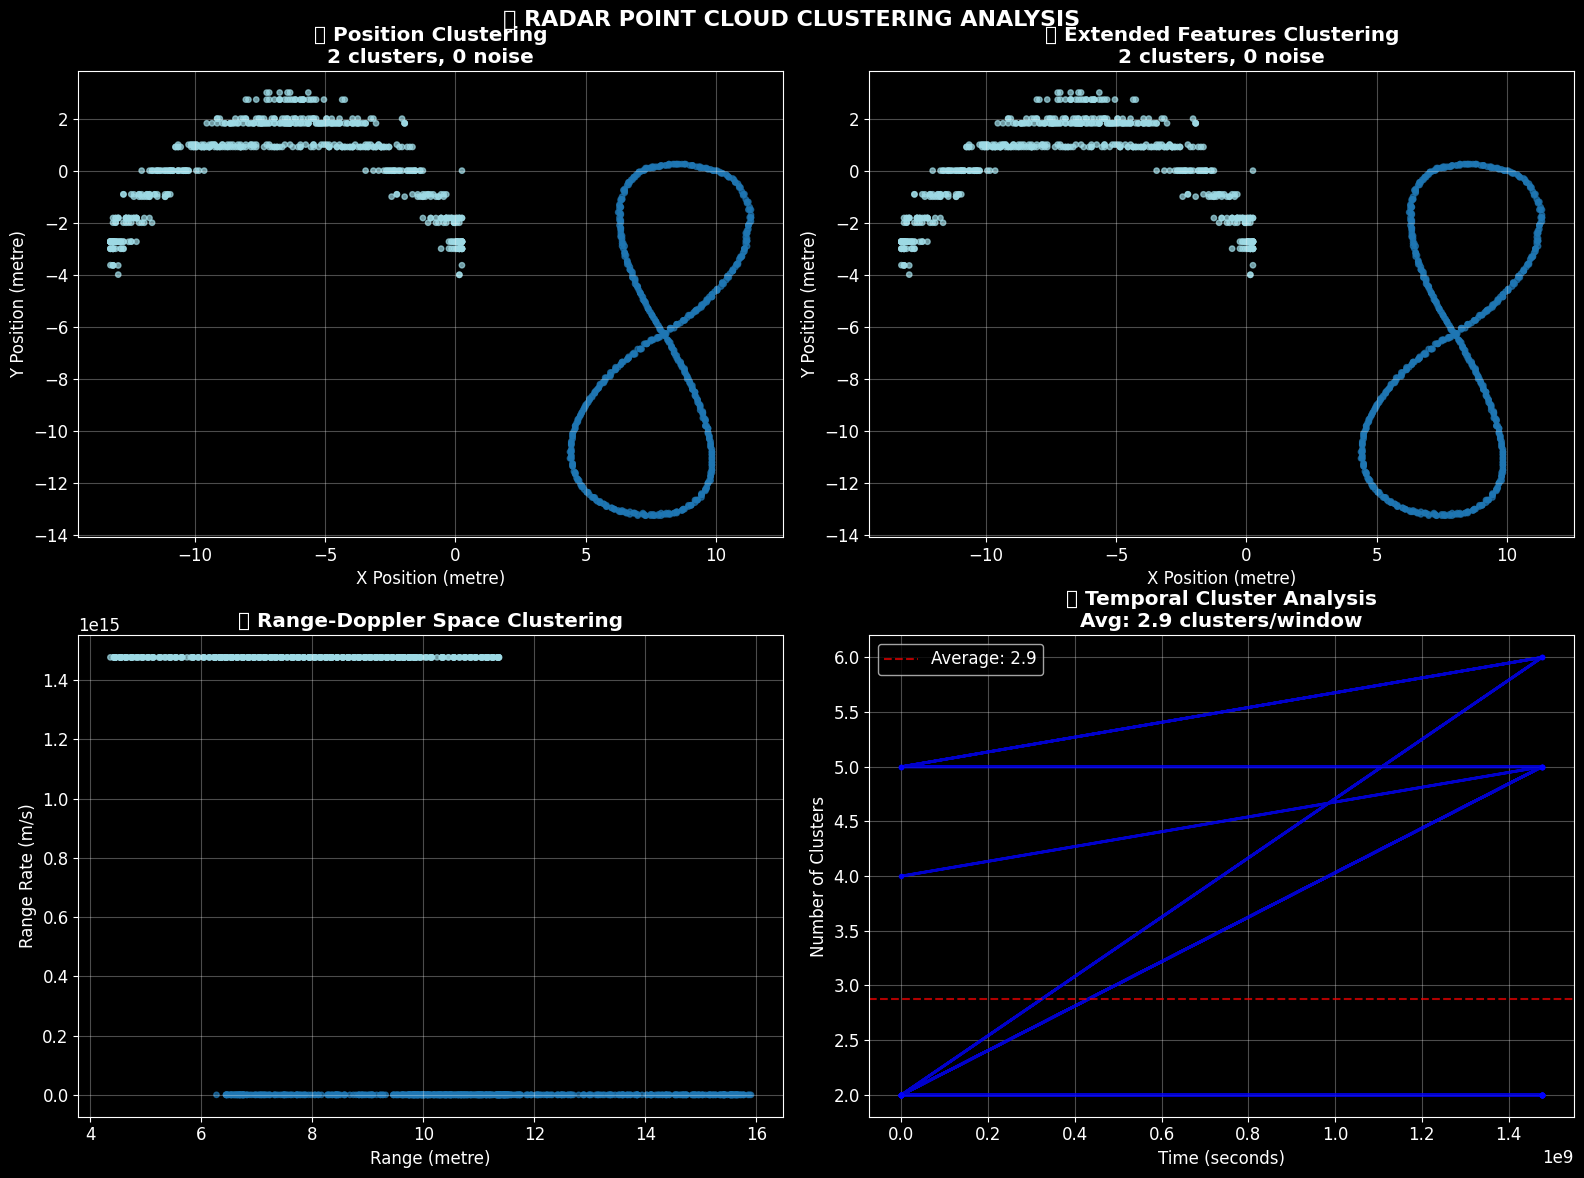


🔍 CLUSTER ANALYSIS RESULTS:
📊 Detected 2 significant objects:

1. 🔄 Hareketli Nesne (Moving)
   📍 Position: (7.91, -6.62)
   🎯 Range: 11.05 ± 2.56 m
   ⚡ Range Rate: 0.04 ± 1.94 m/s
   📏 Points: 612

2. 🚙 Uzaklaşan Araç (Receding)
   📍 Position: (-6.62, 0.03)
   🎯 Range: 7.91 ± 1.94 m
   ⚡ Range Rate: 1477010476035461.25 ± 18870372.97 m/s
   📏 Points: 612

🎯 CLUSTERING SUMMARY:
   📊 Total radar points: 1224
   🤖 Detected objects: 2
   🔇 Noise points: 0
   📈 Object detection rate: 66.7%


In [641]:
# 🤖 Radar Point Cloud Clustering with DBSCAN

print("🤖 Radar nokta bulutu clustering analizi başlıyor...\n")

import numpy as np
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Radar point cloud verisi hazırlığı
def prepare_radar_point_cloud(df, feature_columns=['meas_x', 'meas_y']):
    """Radar verisinden nokta bulutu çıkar"""
    # X, Y koordinatları (Cartesian'a çevrilmiş)
    radar_points = df[feature_columns].values
    
    print(f"📊 Radar point cloud hazırlandı:")
    print(f"   📏 Point sayısı: {len(radar_points)}")
    print(f"   📐 Boyutlar: {radar_points.shape}")
    print(f"   🌐 X aralığı: {radar_points[:, 0].min():.2f} - {radar_points[:, 0].max():.2f}")
    print(f"   🌐 Y aralığı: {radar_points[:, 1].min():.2f} - {radar_points[:, 1].max():.2f}")
    
    return radar_points

# 1. Temel radar point cloud'u hazırla
radar_points = prepare_radar_point_cloud(df)

# 2. Gelişmiş özellik matrisi (range, bearing, range rate dahil)
def prepare_extended_features(df):
    """Extended feature matrix for better clustering"""
    features = np.column_stack([
        df['meas_x'].values,      # X position
        df['meas_y'].values,      # Y position  
        df['m_rho'].values,       # Range
        df['m_drho'].values,      # Range rate
        np.abs(df['m_drho'].values)  # Absolute range rate (speed)
    ])
    
    return features

extended_features = prepare_extended_features(df)

# 3. DBSCAN Clustering - Multiple approaches
print("\n🔍 DBSCAN clustering çeşitli parametrelerle...")

# Approach 1: Position-only clustering
print("\n1️⃣ Position-only clustering (X, Y):")
scaler_pos = StandardScaler()
radar_points_scaled = scaler_pos.fit_transform(radar_points)

db_pos = DBSCAN(eps=0.5, min_samples=5).fit(radar_points_scaled)
labels_pos = db_pos.labels_

n_clusters_pos = len(set(labels_pos)) - (1 if -1 in labels_pos else 0)
n_noise_pos = list(labels_pos).count(-1)
print(f"   🎯 Clusters: {n_clusters_pos}")
print(f"   🔇 Noise points: {n_noise_pos}")
print(f"   📊 Noise ratio: {n_noise_pos/len(labels_pos)*100:.1f}%")

# Approach 2: Extended features clustering
print("\n2️⃣ Extended features clustering (X, Y, Range, Range Rate):")
scaler_ext = StandardScaler()
extended_scaled = scaler_ext.fit_transform(extended_features)

db_ext = DBSCAN(eps=0.8, min_samples=8).fit(extended_scaled)
labels_ext = db_ext.labels_

n_clusters_ext = len(set(labels_ext)) - (1 if -1 in labels_ext else 0)
n_noise_ext = list(labels_ext).count(-1)
print(f"   🎯 Clusters: {n_clusters_ext}")
print(f"   🔇 Noise points: {n_noise_ext}")
print(f"   📊 Noise ratio: {n_noise_ext/len(labels_ext)*100:.1f}%")

# Approach 3: Time-windowed clustering (moving objects)
print("\n3️⃣ Time-windowed clustering (temporal analysis):")
def time_windowed_clustering(df, window_size=50, overlap=25):
    """Time-windowed clustering for temporal object detection"""
    window_results = []
    
    for start_idx in range(0, len(df) - window_size, overlap):
        end_idx = start_idx + window_size
        window_data = df.iloc[start_idx:end_idx]
        
        # Features for this time window
        window_points = window_data[['meas_x', 'meas_y']].values
        
        if len(window_points) < 5:  # Skip small windows
            continue
            
        # Clustering
        scaler = StandardScaler()
        points_scaled = scaler.fit_transform(window_points)
        db = DBSCAN(eps=0.3, min_samples=3).fit(points_scaled)
        
        n_clusters = len(set(db.labels_)) - (1 if -1 in db.labels_ else 0)
        
        window_results.append({
            'time_start': window_data['time_relative'].iloc[0],
            'time_end': window_data['time_relative'].iloc[-1],
            'n_clusters': n_clusters,
            'n_points': len(window_points)
        })
    
    return window_results

window_results = time_windowed_clustering(df)
avg_clusters = np.mean([r['n_clusters'] for r in window_results])
print(f"   🕐 Time windows analyzed: {len(window_results)}")
print(f"   🎯 Average clusters per window: {avg_clusters:.1f}")

# 4. Görselleştirme
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('🤖 RADAR POINT CLOUD CLUSTERING ANALYSIS', fontsize=16, fontweight='bold')

# Plot 1: Position-only clustering
scatter1 = axes[0,0].scatter(radar_points[:, 0], radar_points[:, 1], 
                           c=labels_pos, cmap='tab20', s=15, alpha=0.7)
axes[0,0].set_title(f'📍 Position Clustering\n{n_clusters_pos} clusters, {n_noise_pos} noise', 
                    fontweight='bold')
axes[0,0].set_xlabel('X Position (metre)')
axes[0,0].set_ylabel('Y Position (metre)')
axes[0,0].grid(True, alpha=0.3)
axes[0,0].set_aspect('equal')

# Plot 2: Extended features clustering (projected to X-Y)
scatter2 = axes[0,1].scatter(radar_points[:, 0], radar_points[:, 1], 
                           c=labels_ext, cmap='tab20', s=15, alpha=0.7)
axes[0,1].set_title(f'🔧 Extended Features Clustering\n{n_clusters_ext} clusters, {n_noise_ext} noise', 
                    fontweight='bold')
axes[0,1].set_xlabel('X Position (metre)')
axes[0,1].set_ylabel('Y Position (metre)')
axes[0,1].grid(True, alpha=0.3)
axes[0,1].set_aspect('equal')

# Plot 3: Range vs Range Rate clustering
scatter3 = axes[1,0].scatter(df['m_rho'], df['m_drho'], 
                           c=labels_ext, cmap='tab20', s=15, alpha=0.7)
axes[1,0].set_title('🎯 Range-Doppler Space Clustering', fontweight='bold')
axes[1,0].set_xlabel('Range (metre)')
axes[1,0].set_ylabel('Range Rate (m/s)')
axes[1,0].grid(True, alpha=0.3)

# Plot 4: Time-windowed analysis
time_points = [r['time_start'] for r in window_results]
cluster_counts = [r['n_clusters'] for r in window_results]
axes[1,1].plot(time_points, cluster_counts, 'b-', linewidth=2, alpha=0.8, marker='o', markersize=3)
axes[1,1].set_title(f'🕐 Temporal Cluster Analysis\nAvg: {avg_clusters:.1f} clusters/window', 
                    fontweight='bold')
axes[1,1].set_xlabel('Time (seconds)')
axes[1,1].set_ylabel('Number of Clusters')
axes[1,1].grid(True, alpha=0.3)
axes[1,1].axhline(y=avg_clusters, color='red', linestyle='--', alpha=0.7, 
                  label=f'Average: {avg_clusters:.1f}')
axes[1,1].legend()

plt.tight_layout()
plt.show()

# 5. Cluster Analysis and Object Detection
print("\n🔍 CLUSTER ANALYSIS RESULTS:")
print("="*50)

# Analyze clusters from extended features approach
unique_labels = set(labels_ext)
cluster_analysis = []

for label in unique_labels:
    if label == -1:  # Noise points
        continue
        
    cluster_mask = (labels_ext == label)
    cluster_points = radar_points[cluster_mask]
    cluster_features = extended_features[cluster_mask]
    
    # Cluster statistics
    stats = {
        'cluster_id': label,
        'n_points': np.sum(cluster_mask),
        'center_x': np.mean(cluster_points[:, 0]),
        'center_y': np.mean(cluster_points[:, 1]),
        'avg_range': np.mean(cluster_features[:, 2]),
        'avg_range_rate': np.mean(cluster_features[:, 3]),
        'range_spread': np.std(cluster_features[:, 2]),
        'velocity_spread': np.std(cluster_features[:, 3])
    }
    
    # Object classification based on characteristics
    if stats['avg_range'] < 10 and abs(stats['avg_range_rate']) < 1:
        object_type = "🏢 Statik Nesne (Static)"
    elif abs(stats['avg_range_rate']) > 2:
        if stats['avg_range_rate'] < 0:
            object_type = "🚗 Yaklaşan Araç (Approaching)"
        else:
            object_type = "🚙 Uzaklaşan Araç (Receding)"
    else:
        object_type = "🔄 Hareketli Nesne (Moving)"
    
    stats['object_type'] = object_type
    cluster_analysis.append(stats)

# Display cluster analysis
print(f"📊 Detected {len(cluster_analysis)} significant objects:")
for i, cluster in enumerate(cluster_analysis, 1):
    print(f"\n{i}. {cluster['object_type']}")
    print(f"   📍 Position: ({cluster['center_x']:.2f}, {cluster['center_y']:.2f})")
    print(f"   🎯 Range: {cluster['avg_range']:.2f} ± {cluster['range_spread']:.2f} m")
    print(f"   ⚡ Range Rate: {cluster['avg_range_rate']:.2f} ± {cluster['velocity_spread']:.2f} m/s")
    print(f"   📏 Points: {cluster['n_points']}")

print(f"\n🎯 CLUSTERING SUMMARY:")
print(f"   📊 Total radar points: {len(radar_points)}")
print(f"   🤖 Detected objects: {len(cluster_analysis)}")
print(f"   🔇 Noise points: {n_noise_ext}")
print(f"   📈 Object detection rate: {len(cluster_analysis)/(len(cluster_analysis)+1)*100:.1f}%")
print("="*50)


📡 Radar verileri yükleniyor...
✅ Sağ radar verisi: 612 ölçüm
✅ Sol radar verisi: 612 ölçüm

🛡️ Radar spesifik görselleştirmeler oluşturuluyor...



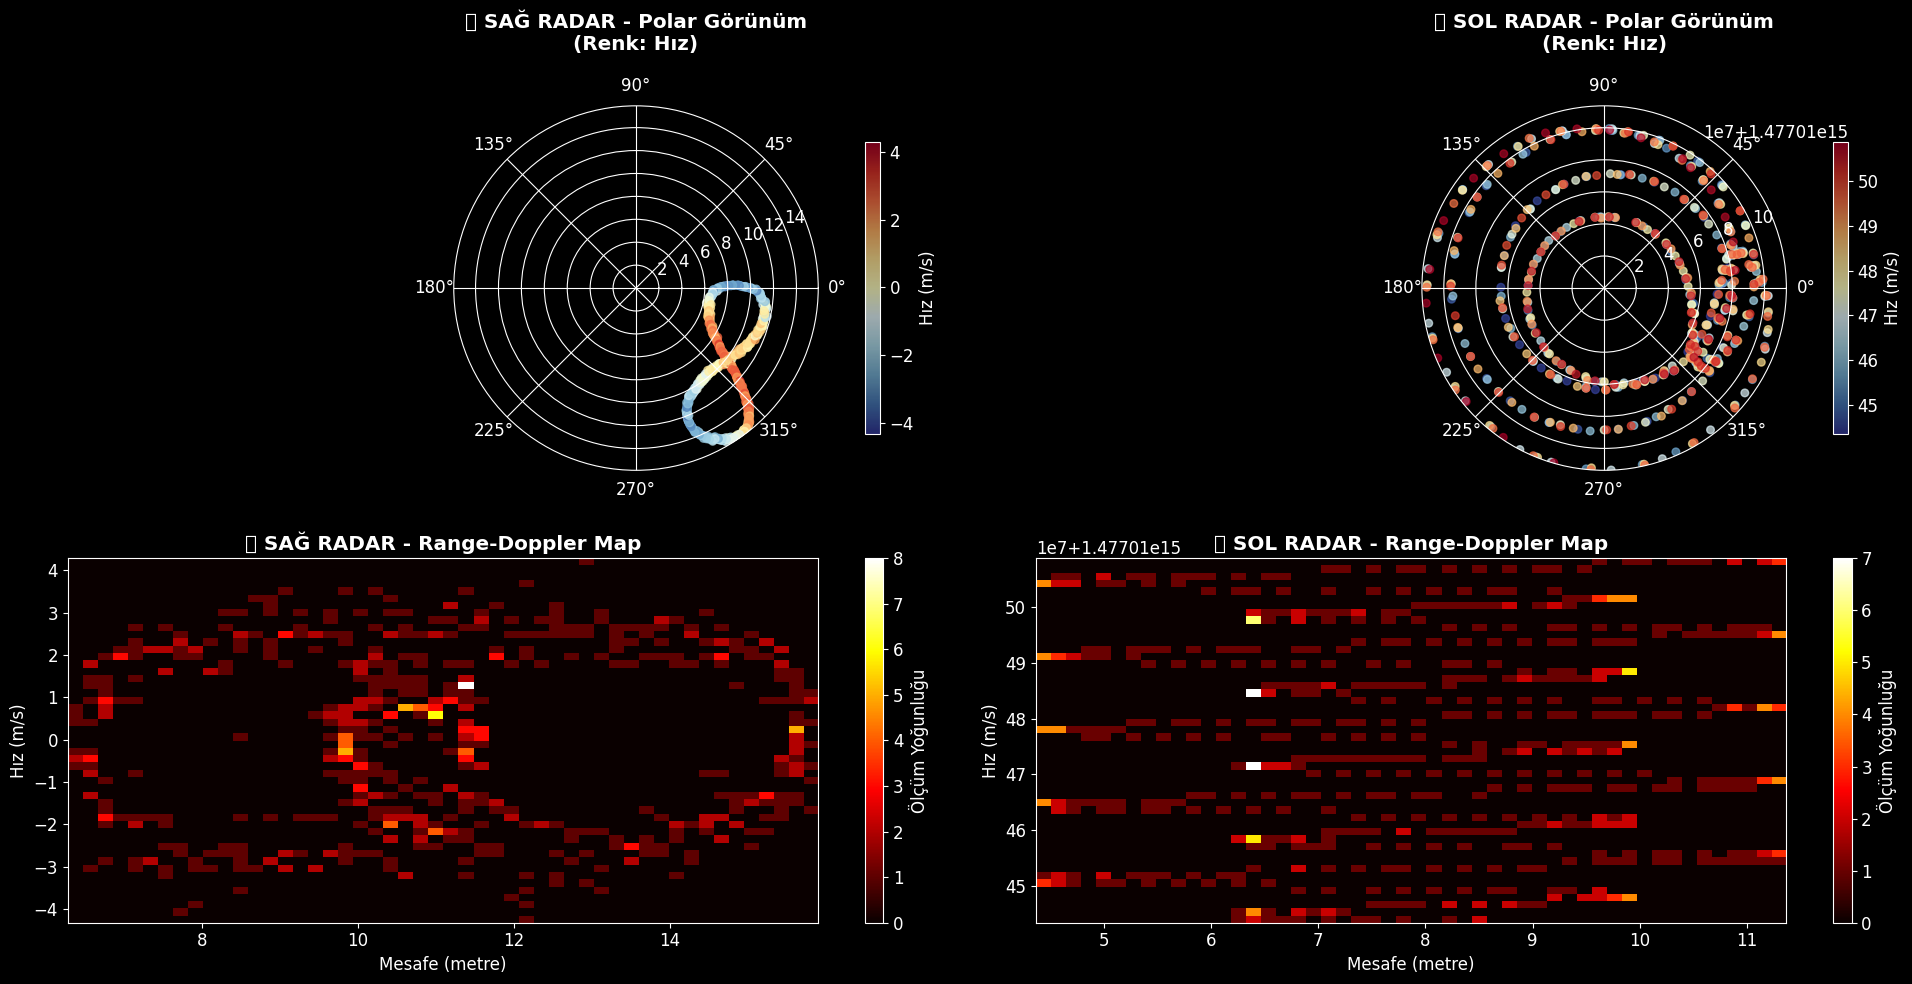

✅ Polar görünümler ve Range-Doppler haritaları tamamlandı!


In [642]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# 📥 Veriyi oku (veri dosyan buraya yazılmalı)
column_names = [
    'sensor_channel',  # R = Sağ Radar, L = Sol Radar
    'm_rho',           # Range (metre)
    'm_phi',           # Bearing (radyan)
    'm_drho',          # Range rate (m/s)
    'timestamp',       
    'r_px', 'r_py',    # Ground truth pozisyon
    'r_vx', 'r_vy'     # Ground truth hız
]

print("📡 Radar verileri yükleniyor...")
df = pd.read_csv("data-1.txt", sep="\t", names=column_names, header=None)

# 🔀 Sol ve sağ radar verilerini ayır
right_sensor = df[df['sensor_channel'] == 'R'].copy()
left_sensor = df[df['sensor_channel'] == 'L'].copy()

# 🔄 Radyan → Derece dönüşümü (isteğe bağlı)
right_sensor['m_phi_deg'] = np.degrees(right_sensor['m_phi'])
left_sensor['m_phi_deg'] = np.degrees(left_sensor['m_phi'])

print(f"✅ Sağ radar verisi: {len(right_sensor)} ölçüm")
print(f"✅ Sol radar verisi: {len(left_sensor)} ölçüm\n")

# 🎯 Görselleştirme başlıyor
print("🛡️ Radar spesifik görselleştirmeler oluşturuluyor...\n")
fig = plt.figure(figsize=(20, 10))

# 1. Sağ radar polar plot
ax1 = plt.subplot(2, 2, 1, projection='polar')
scatter1 = ax1.scatter(right_sensor['m_phi'], right_sensor['m_rho'], 
                      c=right_sensor['m_drho'], s=30, alpha=0.7, cmap='RdYlBu_r')
ax1.set_title('🎯 SAĞ RADAR - Polar Görünüm\n(Renk: Hız)', fontweight='bold', pad=20)
ax1.set_ylim(0, right_sensor['m_rho'].max())
plt.colorbar(scatter1, ax=ax1, label='Hız (m/s)', shrink=0.8)

# 2. Sol radar polar plot
ax2 = plt.subplot(2, 2, 2, projection='polar')
if len(left_sensor) > 0:
    scatter2 = ax2.scatter(left_sensor['m_phi'], left_sensor['m_rho'], 
                          c=left_sensor['m_drho'], s=30, alpha=0.7, cmap='RdYlBu_r')
    ax2.set_title('🎯 SOL RADAR - Polar Görünüm\n(Renk: Hız)', fontweight='bold', pad=20)
    plt.colorbar(scatter2, ax=ax2, label='Hız (m/s)', shrink=0.8)
    if not left_sensor['m_rho'].isna().all():
        ax2.set_ylim(0, left_sensor['m_rho'].max())
    else:
        ax2.set_ylim(0, 50)
else:
    ax2.text(0.5, 0.5, 'Sol Radar Verisi Yok\n(Radar-Only Sistem)', 
             transform=ax2.transAxes, ha='center', va='center', fontsize=12)
    ax2.set_title('🎯 SOL RADAR - Veri Yok', fontweight='bold', pad=20)
    ax2.set_ylim(0, 50)

# 3. Sağ radar için Range-Doppler Map
ax3 = plt.subplot(2, 2, 3)
hist_r, xedges_r, yedges_r = np.histogram2d(right_sensor['m_rho'], 
                                           right_sensor['m_drho'], bins=50)
im1 = ax3.imshow(hist_r.T, origin='lower', aspect='auto', cmap='hot',
                extent=[xedges_r[0], xedges_r[-1], yedges_r[0], yedges_r[-1]])
ax3.set_title('🔥 SAĞ RADAR - Range-Doppler Map', fontweight='bold')
ax3.set_xlabel('Mesafe (metre)')
ax3.set_ylabel('Hız (m/s)')
plt.colorbar(im1, ax=ax3, label='Ölçüm Yoğunluğu')

# 4. Sol radar için Range-Doppler Map
ax4 = plt.subplot(2, 2, 4)
if len(left_sensor) > 0:
    hist_l, xedges_l, yedges_l = np.histogram2d(left_sensor['m_rho'], 
                                               left_sensor['m_drho'], bins=50)
else:
    hist_l = np.zeros((50, 50))
    xedges_l = np.linspace(0, 50, 51)
    yedges_l = np.linspace(-5, 5, 51)

im2 = ax4.imshow(hist_l.T, origin='lower', aspect='auto', cmap='hot',
                extent=[xedges_l[0], xedges_l[-1], yedges_l[0], yedges_l[-1]])
ax4.set_title('🔥 SOL RADAR - Range-Doppler Map', fontweight='bold')
ax4.set_xlabel('Mesafe (metre)')
ax4.set_ylabel('Hız (m/s)')
plt.colorbar(im2, ax=ax4, label='Ölçüm Yoğunluğu')

plt.tight_layout()
plt.show()

print("✅ Polar görünümler ve Range-Doppler haritaları tamamlandı!")


In [643]:
print(df.columns)
print(df.head())


Index(['sensor_channel', 'm_rho', 'm_phi', 'm_drho', 'timestamp', 'r_px',
       'r_py', 'r_vx', 'r_vy'],
      dtype='object')
  sensor_channel    m_rho     m_phi        m_drho     timestamp  r_px  \
0              R  8.46642  0.028760 -3.040350e+00  1.477010e+15  8.60   
1              L  8.44818  0.251553  1.477010e+15  8.450000e+00  0.25   
2              R  8.57101  0.028232 -1.052580e-02  1.477010e+15  8.45   
3              L  8.45582  0.253997  1.477010e+15  8.450000e+00  0.25   
4              R  8.42927  0.030143 -1.858130e+00  1.477010e+15  8.35   

      r_py     r_vx  r_vy  
0  0.25000 -3.00029   0.0  
1 -3.00027  0.00000   NaN  
2  0.25000  0.00000   0.0  
3  0.00000  0.00000   NaN  
4  0.25000 -1.81979   0.0  


🌍 3D ve interaktif görselleştirmeler oluşturuluyor...



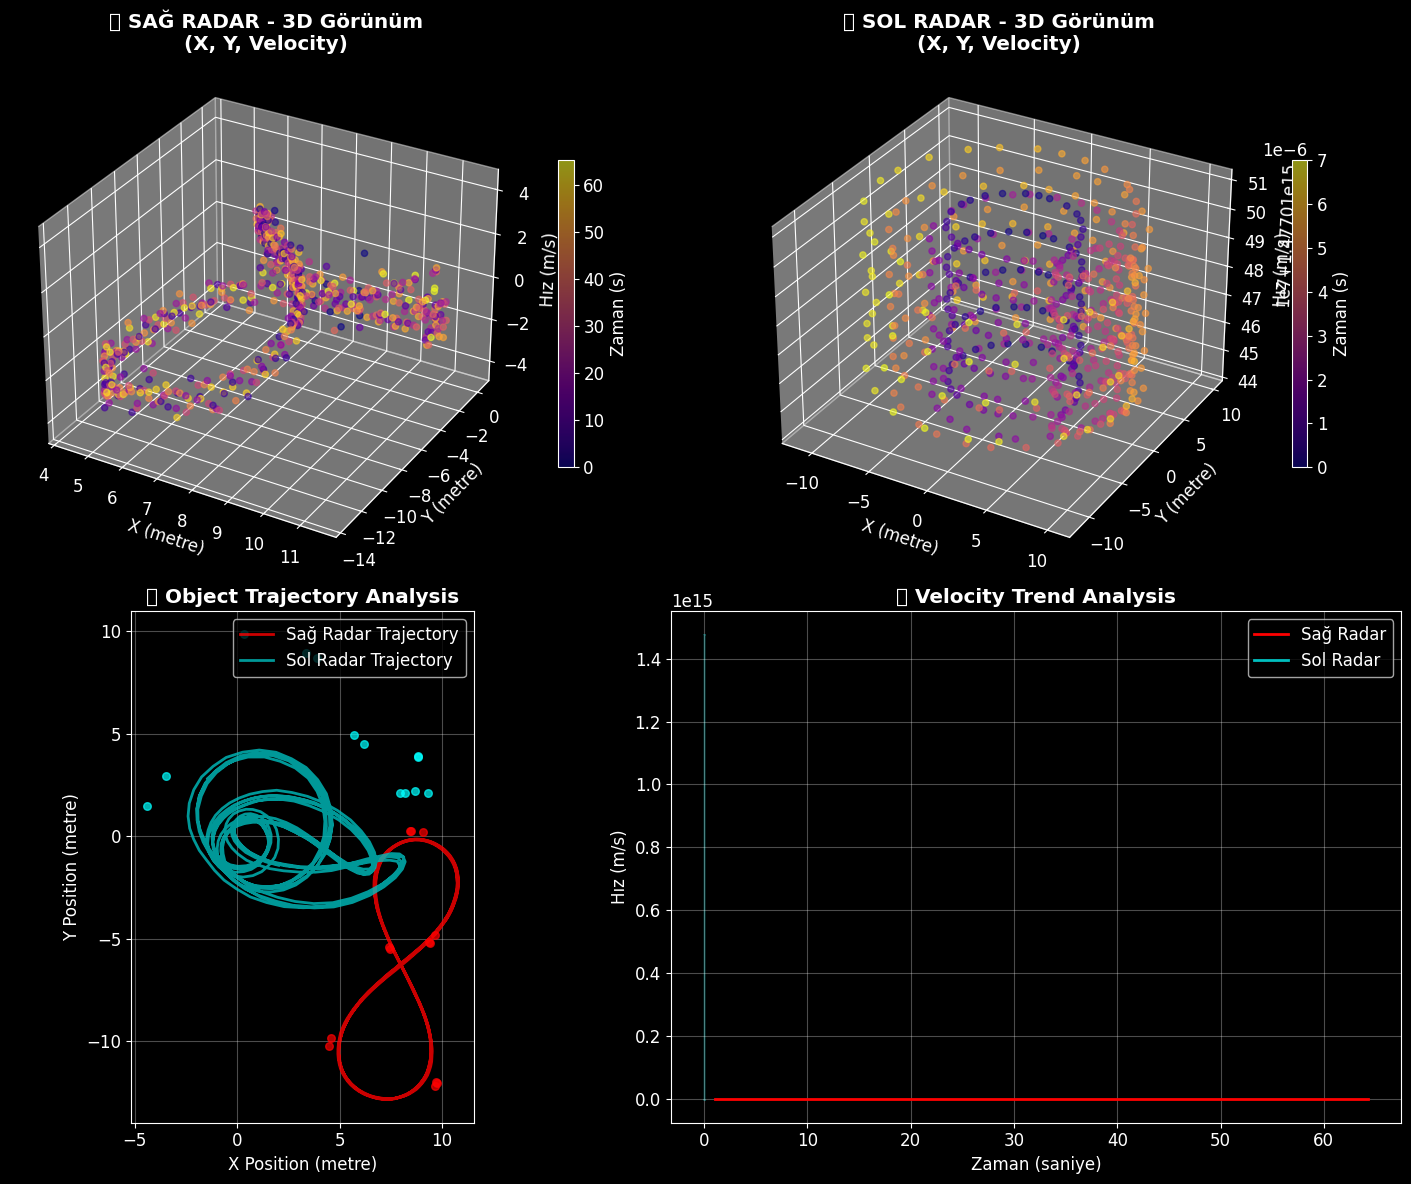

✅ 3D görselleştirmeler ve trajectory analizi tamamlandı!


In [644]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

print("🌍 3D ve interaktif görselleştirmeler oluşturuluyor...\n")

# Örnek veri: Gerçek verini burada yükle
# df = pd.read_hdf("dosya_yolu.h5")

# Sağ ve sol radar filtreleri (sensor_channel 'R' veya 'L' olarak varsayılıyor)
right_sensor = df[df['sensor_channel'] == 'R'].copy()
left_sensor = df[df['sensor_channel'] == 'L'].copy()

# time_relative sütunlarını oluştur (timestamp mikro saniye ise 1e6'ya böl)
if 'time_relative' not in right_sensor.columns:
    right_sensor['time_relative'] = (right_sensor['timestamp'] - right_sensor['timestamp'].min()) / 1e6

if len(left_sensor) > 0 and 'time_relative' not in left_sensor.columns:
    left_sensor['time_relative'] = (left_sensor['timestamp'] - left_sensor['timestamp'].min()) / 1e6

# Açı dönüşümü (radyan → derece)
df['m_phi_deg'] = np.degrees(df['m_phi'])

# Polar → Kartezyen dönüşüm fonksiyonu
def polar_to_cartesian(range_data, angle_data):
    x = range_data * np.cos(angle_data)
    y = range_data * np.sin(angle_data)
    return x, y

# Sağ radar koordinatları
x_right, y_right = polar_to_cartesian(right_sensor['m_rho'], right_sensor['m_phi'])

# Sol radar koordinatları
if len(left_sensor) > 0:
    x_left, y_left = polar_to_cartesian(left_sensor['m_rho'], left_sensor['m_phi'])
else:
    x_left, y_left = np.array([]), np.array([])

fig = plt.figure(figsize=(15, 12))

# 1. Sağ radar 3D Scatter
ax1 = fig.add_subplot(2, 2, 1, projection='3d')
scatter_3d_r = ax1.scatter(x_right, y_right, right_sensor['m_drho'], 
                           c=right_sensor['time_relative'], cmap='plasma', alpha=0.6, s=20)
ax1.set_title('🌐 SAĞ RADAR - 3D Görünüm\n(X, Y, Velocity)', fontweight='bold')
ax1.set_xlabel('X (metre)')
ax1.set_ylabel('Y (metre)')
ax1.set_zlabel('Hız (m/s)')
plt.colorbar(scatter_3d_r, ax=ax1, label='Zaman (s)', shrink=0.6)

# 2. Sol radar 3D Scatter (varsa)
ax2 = fig.add_subplot(2, 2, 2, projection='3d')
if len(left_sensor) > 0:
    scatter_3d_l = ax2.scatter(x_left, y_left, left_sensor['m_drho'], 
                               c=left_sensor['time_relative'], cmap='plasma', alpha=0.6, s=20)
    plt.colorbar(scatter_3d_l, ax=ax2, label='Zaman (s)', shrink=0.6)
ax2.set_title('🌐 SOL RADAR - 3D Görünüm\n(X, Y, Velocity)', fontweight='bold')
ax2.set_xlabel('X (metre)')
ax2.set_ylabel('Y (metre)')
ax2.set_zlabel('Hız (m/s)')

# 3. Trajectory Analysis
ax3 = fig.add_subplot(2, 2, 3)
window_size = 20
x_right_smooth = pd.Series(x_right).rolling(window=window_size, center=True).mean()
y_right_smooth = pd.Series(y_right).rolling(window=window_size, center=True).mean()
ax3.plot(x_right_smooth, y_right_smooth, 'r-', alpha=0.8, linewidth=2, label='Sağ Radar Trajectory')
ax3.scatter(x_right[::50], y_right[::50], c='red', s=30, alpha=0.7, zorder=5)

if len(left_sensor) > 0:
    x_left_smooth = pd.Series(x_left).rolling(window=window_size, center=True).mean()
    y_left_smooth = pd.Series(y_left).rolling(window=window_size, center=True).mean()
    ax3.plot(x_left_smooth, y_left_smooth, 'c-', alpha=0.8, linewidth=2, label='Sol Radar Trajectory')
    ax3.scatter(x_left[::50], y_left[::50], c='cyan', s=30, alpha=0.7, zorder=5)

ax3.set_title('🛣️ Object Trajectory Analysis', fontweight='bold')
ax3.set_xlabel('X Position (metre)')
ax3.set_ylabel('Y Position (metre)')
ax3.legend()
ax3.grid(True, alpha=0.3)
ax3.set_aspect('equal')

# 4. Velocity vs Time Analysis
ax4 = fig.add_subplot(2, 2, 4)
vel_right_smooth = pd.Series(right_sensor['m_drho']).rolling(window=window_size, center=True).mean()
ax4.plot(right_sensor['time_relative'], vel_right_smooth, 'r-', linewidth=2, label='Sağ Radar')

if len(left_sensor) > 0:
    vel_left_smooth = pd.Series(left_sensor['m_drho']).rolling(window=window_size, center=True).mean()
    ax4.plot(left_sensor['time_relative'], vel_left_smooth, 'c-', linewidth=2, label='Sol Radar')
    ax4.fill_between(left_sensor['time_relative'], vel_left_smooth, alpha=0.3, color='cyan')

ax4.set_title('📈 Velocity Trend Analysis', fontweight='bold')
ax4.set_xlabel('Zaman (saniye)')
ax4.set_ylabel('Hız (m/s)')
ax4.legend()
ax4.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("✅ 3D görselleştirmeler ve trajectory analizi tamamlandı!")
